In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import squarify
import seaborn as sns
import os


In [ ]:
#preprocessing
def read(cur_city_path): #read data from cur_city_path
    return pd.read_csv(cur_city_path)

def show_head(city):
    print(city.head())

def convert(city):
    city['date'] = pd.to_datetime(city['date'])
    city['month'] = city['date'].dt.month
    city['day'] = city['date'].dt.day
    city['year'] = city['date'].dt.year
    return city

def compute_health_level(city):
    # Create the bins in which Data will be held  
    bins = [0, 50, 100, 150, 200, 300, 500]
    # Create the names for the five bins (refer to Air quality levels, eg: unhealthySG - Unhealthy for Sensitive Groups)
    group_names = ["good", "moderate", "unhealthySG", "unhealthy", "very unhealthy","hazardous"]
    city["health level"] = pd.cut(city["AQI"], bins, labels=group_names, include_lowest=True)
    return city

def compute_lockdown(city,date_20_start,date_20_end,date_19_start,date_19_end):
    lockdown20=city[(city['date']>=date_20_start)&(city['date']<=date_20_end)]
    lockdown19=city[(city['date']>=date_19_start)&(city['date']<=date_19_end)]
    return lockdown20,lockdown19

In [ ]:

def heat_map(city,cur_city_name,cur_country_name,save_or_not,save_dir):
    city_full_2019=city.loc[city['year']==2019]
    city_full_2020=city.loc[city['year']==2020]
    
    # create a spreadsheet-style pivot table as a DataFrame
    city_pivot2019 = city_full_2019.pivot_table('AQI','month','day')
    city_pivot2020 = city_full_2020.pivot_table('AQI','month','day')

    f1, ax = plt.subplots(figsize=(20, 7))
    sns.heatmap(city_pivot2019, annot=True, fmt="g", linewidths=.5, ax=ax, vmax=200, cmap = "RdYlGn_r")
    plt.title(cur_city_name+", "+cur_country_name+" Air Quality Index (AQI) Heatmap (Day-by-day 2019)", fontsize=16)
    plt.ylabel("Month", fontsize=12)
    plt.xlabel("Day", fontsize=12)
    
    save_2019_name=cur_city_name+'_'+cur_country_name+"_AQI_Heatmap_2019.png"
    if save_or_not and save_dir is not None:
        plt.savefig(os.path.join(save_dir,save_2019_name))
    plt.show()
    f1, ax = plt.subplots(figsize=(20, 7))
    sns.heatmap(city_pivot2020, annot=True, fmt="g", linewidths=.5, ax=ax, vmax=200, cmap = "RdYlGn_r")
    plt.title(cur_city_name+", "+cur_country_name+" Air Quality Index (AQI) Heatmap (Day-by-day 2020)", fontsize=16)
    plt.ylabel("Month", fontsize=12)
    plt.xlabel("Day", fontsize=12)
    
    save_2020_name=cur_city_name+'_'+cur_country_name+"_AQI_Heatmap_2020.png"
    if save_or_not and save_dir is not None:
        plt.savefig(os.path.join(save_dir,save_2020_name))
    plt.show()
    city_diff=city_pivot2020-city_pivot2019
    f1, ax = plt.subplots(figsize=(20, 7))
    sns.heatmap(city_diff, annot=True, fmt="g", linewidths=.5, ax=ax,vmin=-100, vmax=200, cmap = "RdYlGn_r")
    plt.title(cur_city_name+", "+cur_country_name+" Air Quality Index (AQI) Heatmap (Day-by-day difference of 2020 - 2019)", fontsize=16)
    plt.ylabel("Month", fontsize=12)
    plt.xlabel("Day", fontsize=12)
    
    save_diff_name=cur_city_name+'_'+cur_country_name+"_Difference_of_2020-2019"+"_AQI_Heatmap.png"
    if save_or_not and save_dir is not None:
        plt.savefig(os.path.join(save_dir,save_diff_name))
    
    
    plt.show()




In [ ]:
def pollutant_treemap(lockdown,cur_city_name,cur_year,save_or_not,save_dir,which_time):
    squarify.plot(sizes=lockdown.mean()[0:6], label=["pm25", "pm10", "o3", "so2", "no2", "co",], alpha=.6)
    plt.axis('off')
    plt.title(cur_city_name+" "+which_time+" time lockdown, Average Pollutant Proportion in "+cur_year)
    save_name = cur_city_name+"_"+which_time+"_Average_Pollutant_Proportion_in_"+cur_year+'.png'
    if save_or_not and save_dir is not None:
        plt.savefig(os.path.join(save_dir,save_name))
    plt.show()

In [ ]:
def aqi_change(lockdown19,lockdown20,cur_city_name,cur_country_name):
    AQIchange="{:.2%}".format(((lockdown19['AQI'].mean()-lockdown20['AQI'].mean())/lockdown19['AQI'].mean()))
    change_df=pd.DataFrame({"City":[cur_city_name],
                        "Country":[cur_country_name],
                        "AQIchange":[AQIchange]})
    return change_df

In [ ]:
def barchart(city, cur_city_name,cur_country_name, month, year19, year20, save_or_not=False, save_dir=None):
    # set width of bar
    barWidth = 0.5

    month=month.capitalize() 
    month_name=['January','February','March','April','May','June','July','August','September','October','November','December']
    number=list(range(1,13))
    dic=dict(zip(month_name, number))
    month_number=dic[month] # get the number of month

    city19=city[(city['month']==month_number) &(city['year']==int(year19))]
    city20=city[(city['month']==month_number) &(city['year']==int(year20))]
    citygrouped19=city19.groupby("health level")
    citygrouped20=city20.groupby("health level")

    city_count19=citygrouped19['date'].count().values
    city_count20=citygrouped20['date'].count().values

    bars1= [city_count19[0]+1, city_count20[0]+1]
    bars2= [city_count19[1]+1, city_count20[1]+1]
    bars3= [city_count19[2]+1, city_count20[2]+1]
    bars4= [city_count19[3]+1, city_count20[3]+1]
    bars5= [city_count19[4]+1, city_count20[4]+1]
    bars6= [city_count19[5]+1, city_count20[5]+1]
    r1=np.array([0.5,4.5])
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    r5 = [x + barWidth for x in r4]
    r6 = [x + barWidth for x in r5]

    # print(r1,r2,r3,r4,r5,r6)
    fig, (ax1) = plt.subplots(1,1, figsize = (10,5))
    # Make the plot according to air color color label referrence
    ax1.bar(r1, bars1, color='green', width=barWidth, edgecolor='white', label='good')
    ax1.bar(r2, bars2, color='yellow', width=barWidth, edgecolor='white', label='moderate')
    ax1.bar(r3, bars3, color='orange', width=barWidth, edgecolor='white', label='unhealthy for SG')
    ax1.bar(r4, bars4, color='red', width=barWidth, edgecolor='white', label='unhealthy')
    ax1.bar(r5, bars5, color='purple', width=barWidth, edgecolor='white', label='very unhealthy')
    ax1.bar(r6, bars6, color='darkred', width=barWidth, edgecolor='white', label='hazardous')

    # Add xticks on the middle of the group bars
    # plt.xticks([0.4, 1.4])

    ax1.set_xticks([2,6])
    ax1.set_xticklabels([year19, year20])

    # Create legend & Show graphic
    ax1.legend(loc = "upper left")

    ax1.set(xlabel=month, ylabel='Days Count')
    val=7.5
    ylim=30
    # if not have_lockdown: #full year
    #     ylim=100
    ax1.set_ylim(0, ylim)
    ax1.set_xlim(0, val)
    fig.suptitle(cur_city_name+", "+cur_country_name+" Day Counts of Level of Health Concern in "+month+" "+year19+" vs. "+year20)
    
    save_name=cur_city_name+"_"+str(month_number)+'_'+month+"_"+year19+"_and_"+year20+'_'+cur_country_name+"_barchart.png"
    if save_or_not and save_dir is not None:
        plt.savefig(os.path.join(save_dir,save_name))
    plt.show()



In [ ]:
# Start writing code here...
import os
def make_barchart(city,cur_city_name,cur_country_name,start_date,end_date,year19,year20,save_or_not,save_dir):
    month_name=['January','February','March','April','May','June','July','August','September','October','November','December']
    number=list(range(1,13))
    dic=dict(zip(number, month_name))
    s=int(start_date.split('-')[1])
    e=int(end_date.split('-')[1])
    for month_number in range(s,e+1):
        month=dic[month_number]
        barchart(city,cur_city_name,cur_country_name,month,year19,year20,save_or_not,save_dir)
def visulization(cur_country_name,cur_city_name,cur_city_path,lockdown_date,save_or_not,save_dir=None):
    city=read(cur_city_path)
    city=convert(city)
    city=compute_health_level(city)
    save_dir=cur_city_name+'_'+save_dir
    if save_or_not and save_dir is not None:
        if not os.path.exists(save_dir):
            os.mkdir(save_dir)
    heat_map(city,cur_city_name,cur_country_name,save_or_not,save_dir) #if you want to save the heatmap to disk, set save_or_not to True
    
    time={0:'first',1:'second',2:'third'}
    if lockdown_date is not None: # have lockdown
        for times, ldd in enumerate(lockdown_date):
            print('---------------------------------------------')
            if save_or_not and save_dir is not None:
                save_cur_dir=os.path.join(save_dir,time[times])
                if not os.path.exists(save_cur_dir):
                    os.mkdir(save_cur_dir)
            else:
                save_cur_dir = None
            
            date_20_start,date_20_end,date_19_start,date_19_end=ldd #you need to specify the lockdown date in 2020
            lockdown20,lockdown19=compute_lockdown(city,date_20_start,date_20_end,date_19_start,date_19_end)
            year19, year20 = date_19_start.split('-')[0], date_20_start.split('-')[0]
            pollutant_treemap(lockdown19,cur_city_name,year19,save_or_not,save_cur_dir,time[times])
            pollutant_treemap(lockdown20,cur_city_name,year20,save_or_not,save_cur_dir,time[times])
            change_df=aqi_change(lockdown19,lockdown20,cur_city_name,cur_country_name)
            print(time[times]+' lockdown')
            print(change_df)
            make_barchart(city,cur_city_name,cur_country_name,date_19_start,date_19_end,year19,year20,save_or_not,save_cur_dir)
    else: #have no lockdown
        print('---------------------------------------------')
        times=0
        if save_or_not and save_dir is not None:
            save_cur_dir=os.path.join(save_dir,time[times])
            if not os.path.exists(save_cur_dir):
                os.mkdir(save_cur_dir)
        else:
            save_cur_dir = None
        
        date_20_start,date_20_end,date_19_start,date_19_end=('2020-01-01', '2020-12-31', '2019-01-01', '2019-12-31')
        #you need to specify the lockdown date in 2020
        lockdown20,lockdown19=compute_lockdown(city,date_20_start,date_20_end,date_19_start,date_19_end)
        year19, year20 = date_19_start.split('-')[0], date_20_start.split('-')[0]
        pollutant_treemap(lockdown19,cur_city_name,year19,save_or_not,save_cur_dir,time[times])
        pollutant_treemap(lockdown20,cur_city_name,year20,save_or_not,save_cur_dir,time[times])
        change_df=aqi_change(lockdown19,lockdown20,cur_city_name,cur_country_name)
        print(time[times]+' lockdown')
        print(change_df)
        make_barchart(city,cur_city_name,cur_country_name,date_19_start,date_19_end,year19,year20,save_or_not,save_cur_dir)


            
   
    

Los Angeles 有问题.

In [ ]:
# lockdown dates here
lockdown_dates = {'Greater Miami': [('2020-03-24', '2020-05-18', '2019-03-24', '2019-05-18')],
                  'Greater Los Angeles': [('2020-03-20', '2020-05-29', '2019-03-20', '2019-05-29'), ('2020-11-27', '2021-01-25', '2019-11-27', '2020-01-25')],
                  'New York City': [('2020-03-22', '2020-06-07', '2019-03-22', '2019-06-07')],
                  'London': [('2020-03-23', '2020-05-10', '2019-03-23', '2019-05-10'), ('2020-11-05', '2020-12-02', '2019-11-05', '2019-12-02'), ('2021-01-06', '2021-03-06', '2019-01-06', '2019-03-06')],
                  'Milan': [('2020-03-08', '2020-05-04', '2019-03-08', '2019-05-04')],
                  'Rome': [('2020-03-08', '2020-05-04', '2019-03-08', '2019-05-04')],
                  'Johannesburg': [('2020-03-27', '2020-06-01', '2019-03-27', '2019-06-01')],
                  'Wuhan': [('2020-01-23', '2020-04-08', '2019-01-23', '2019-04-08')],
                  'Shanghai': [('2020-01-24', '2020-03-22', '2019-01-24', '2019-03-22')],
                  'Beijing': None,
                  'Hong Kong': None,
                  'Seoul': None,
                  'Sao Paulo': None,
                  'Sydney': None
                  }


### Asia - Wuhan

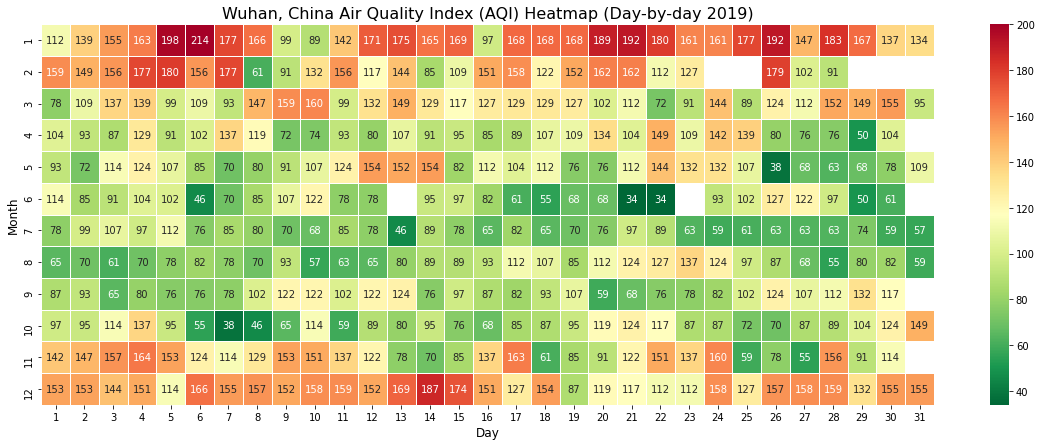

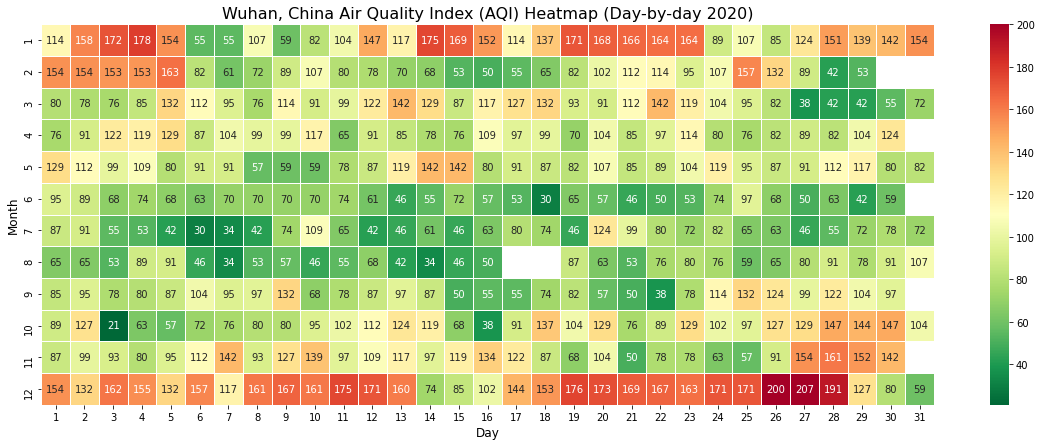

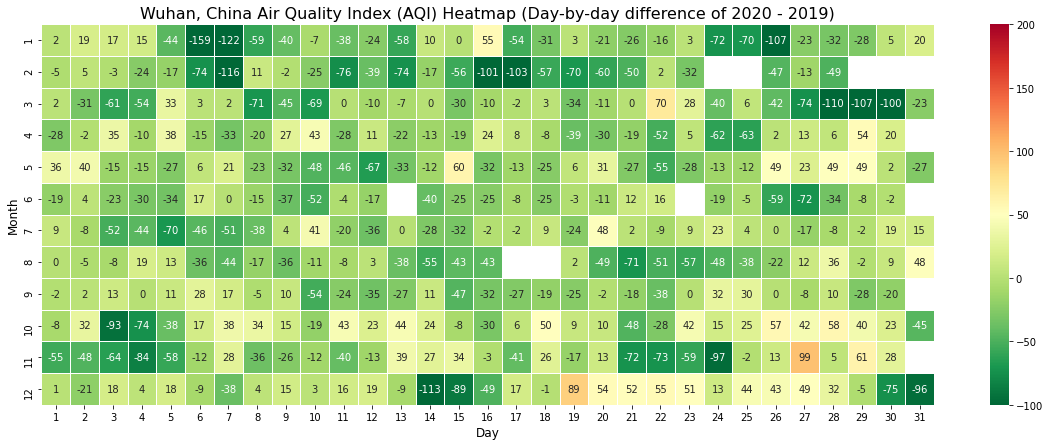

---------------------------------------------
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


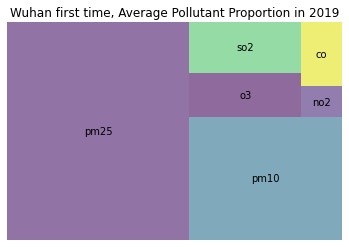

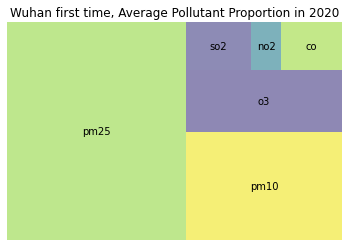

first lockdown
    City Country AQIchange
0  Wuhan   China    22.79%


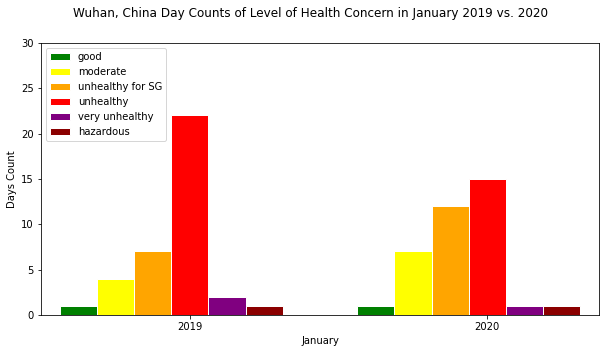

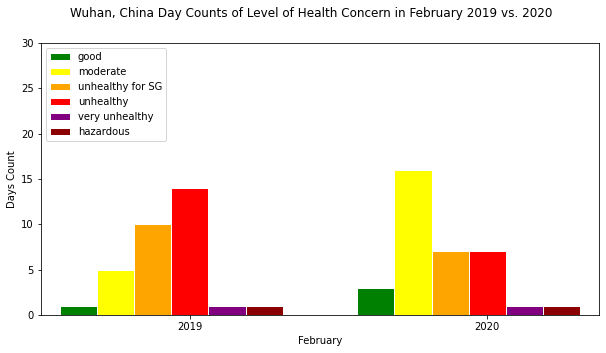

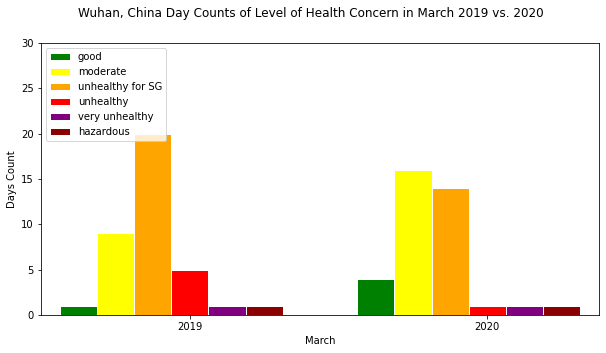

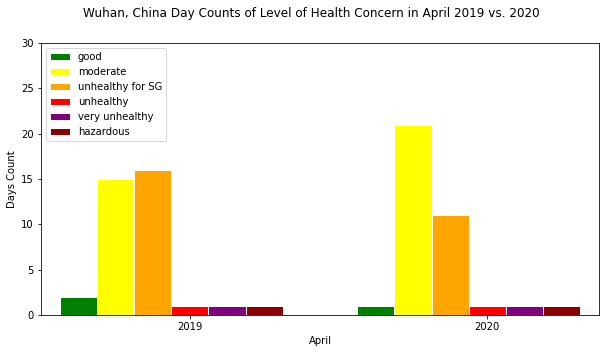

In [ ]:
# If you hope to visualize the data, just change the parameter in this cell.
lockdown_date=lockdown_dates['Wuhan']
visulization(cur_city_name="Wuhan",cur_country_name="China",\
            cur_city_path='city_cleaned_data/wuhan_AQI.csv',\
            lockdown_date=lockdown_date,save_or_not=True,save_dir='visual_generated') #save_or_not means whether you want to save the visualization picture to disk.

  

### Asia - Beijing
~~1. missing data after Sep 2020~~


- 2. no clear lockdown start date, end date, can't 
 treemap with current code, can't generate AQI change %
- 3. Beijing and HongKong's data presents same problems
      

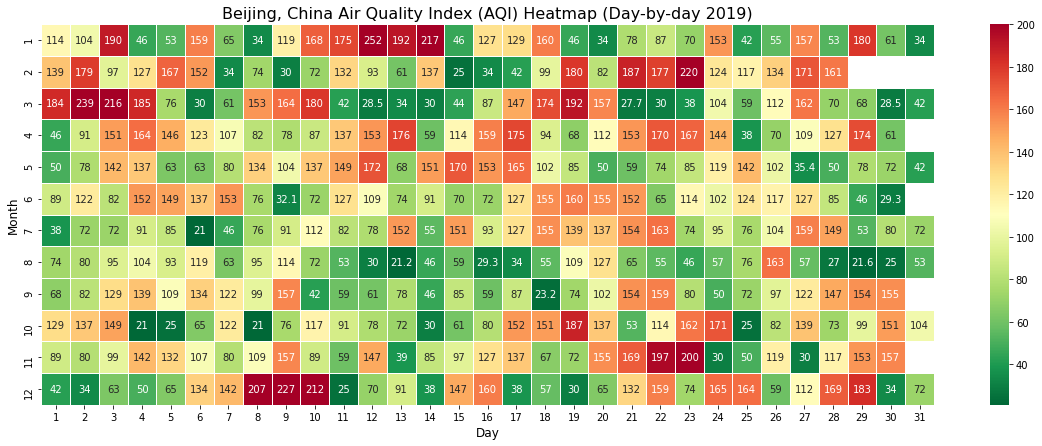

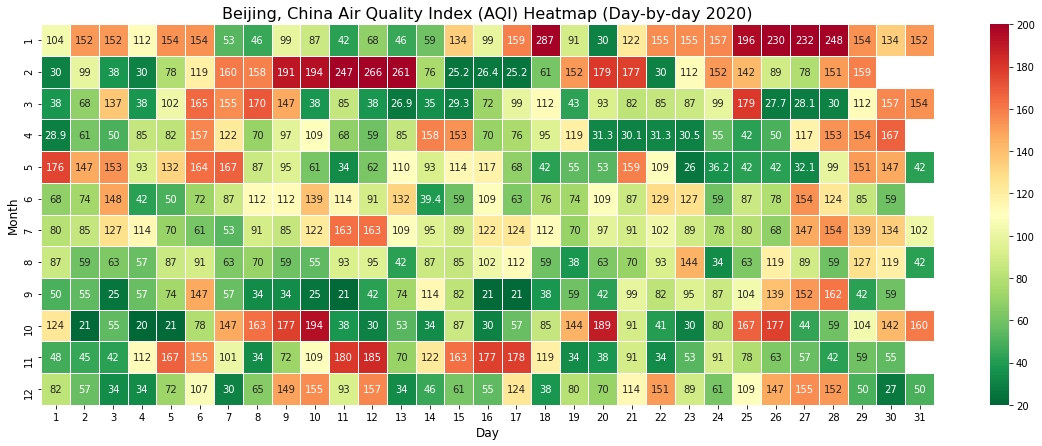

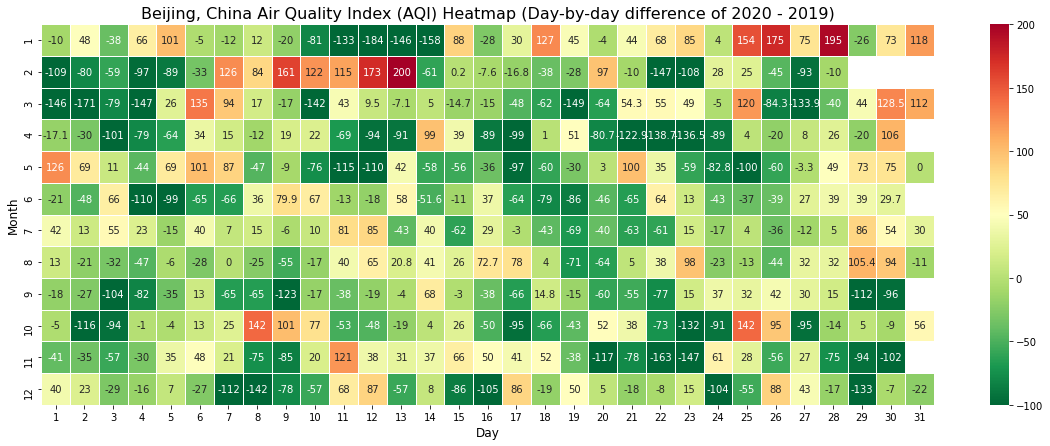

---------------------------------------------
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


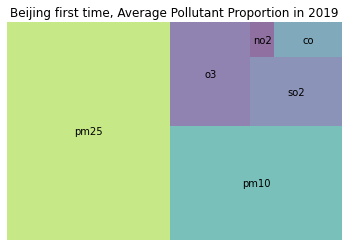

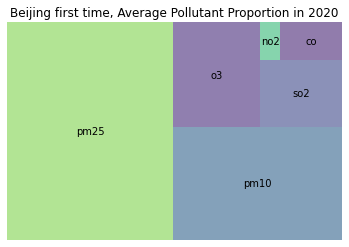

first lockdown
      City Country AQIchange
0  Beijing   China     7.62%


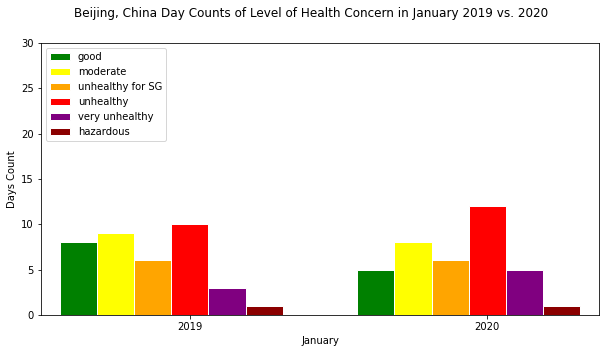

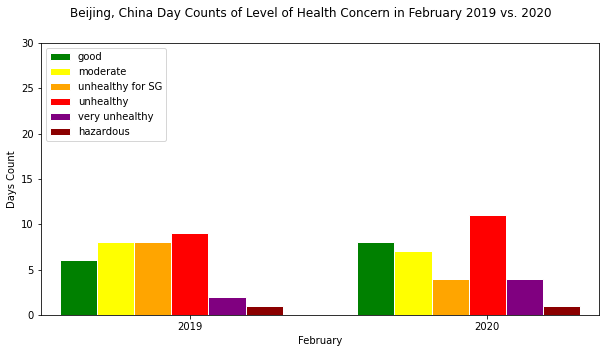

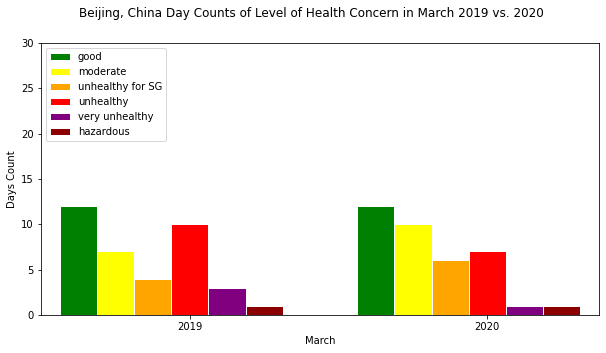

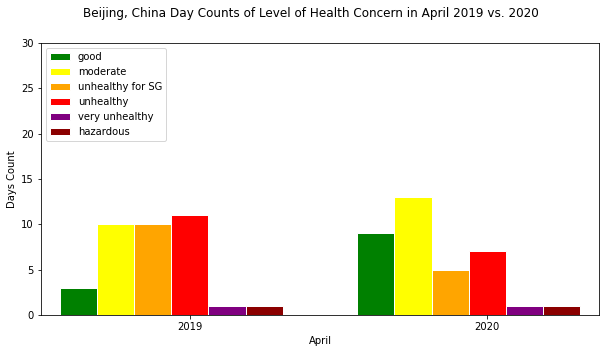

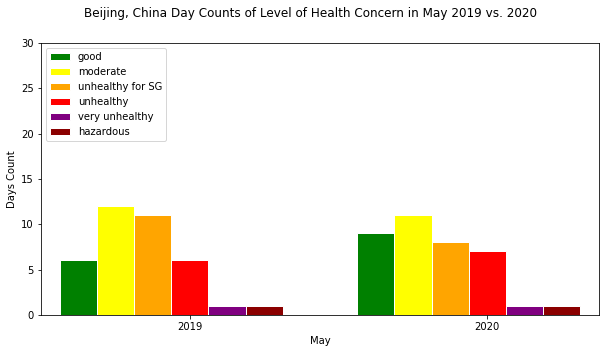

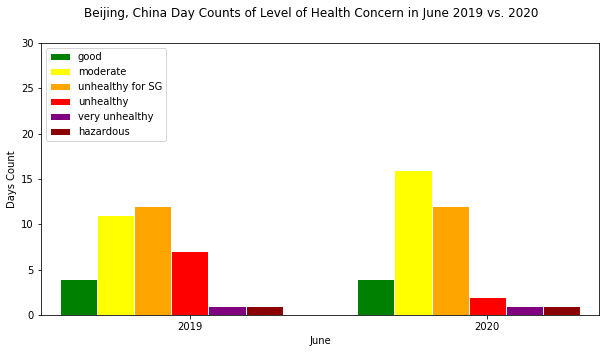

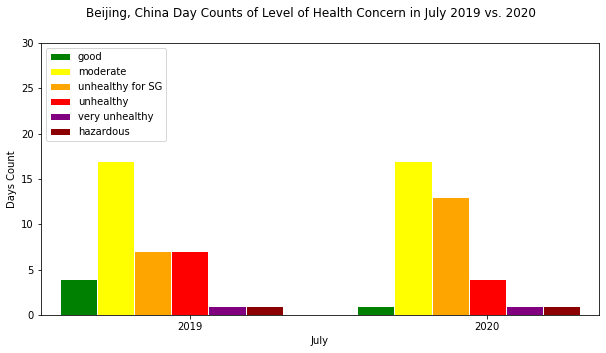

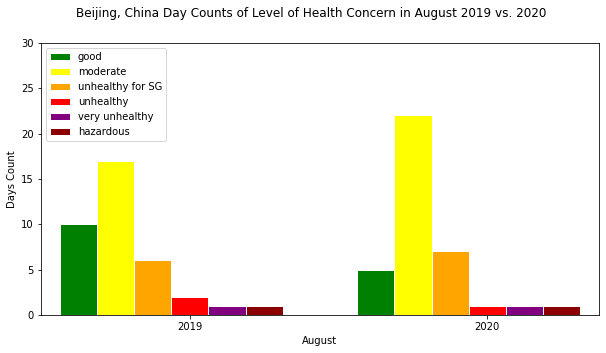

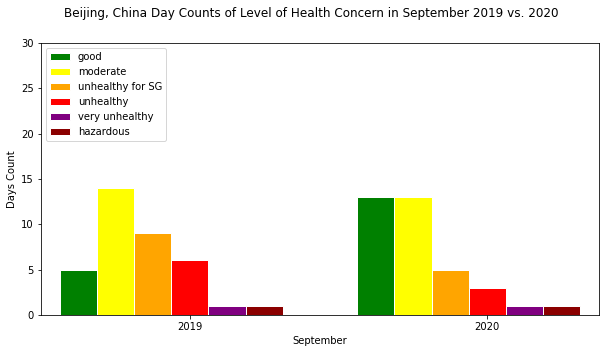

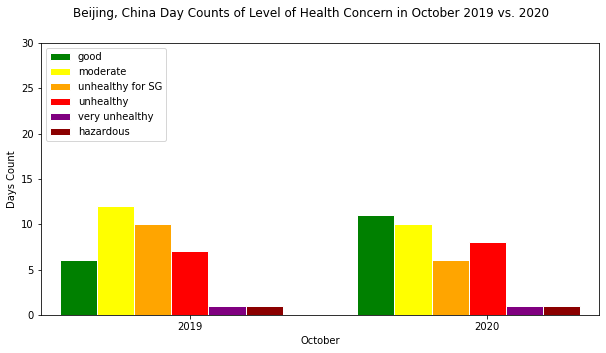

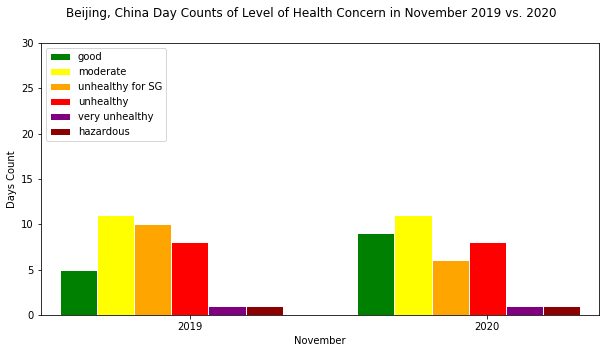

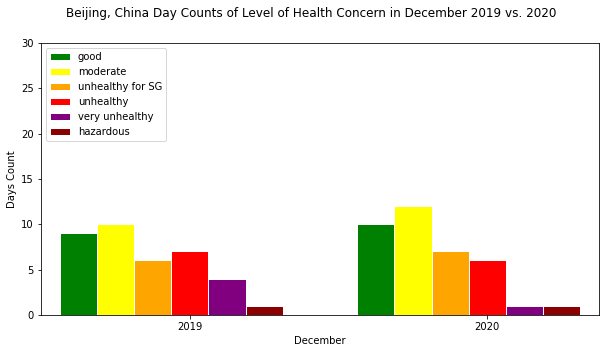

In [ ]:
lockdown_date=lockdown_dates['Beijing']
visulization(cur_city_name="Beijing",cur_country_name="China",\
            cur_city_path='city_cleaned_data/beijing_AQI.csv',\
            lockdown_date=lockdown_date,save_or_not=True,save_dir='visual_generated')
            #save_or_not means whether you want to save the visualization picture to disk.

  

### Asia - Seoul

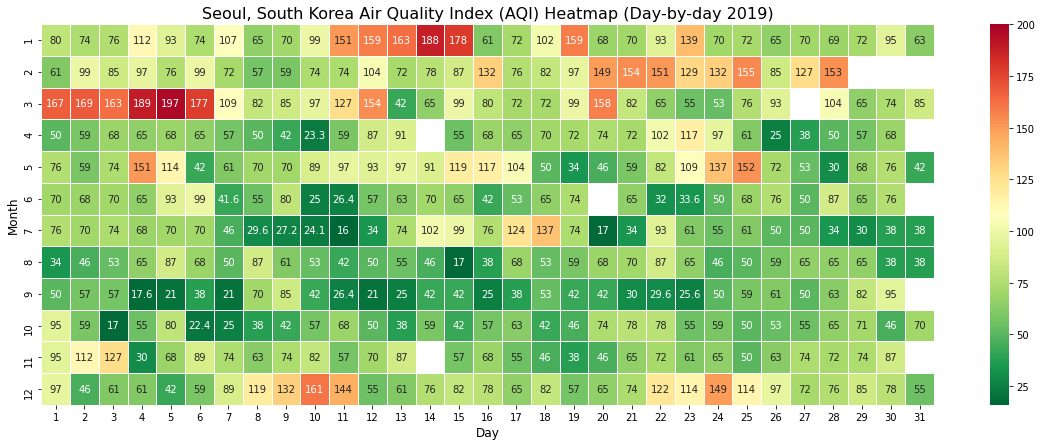

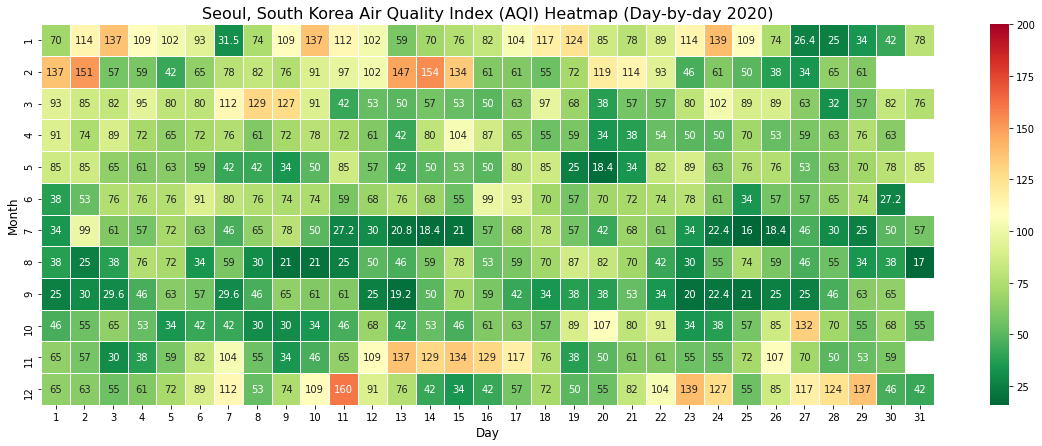

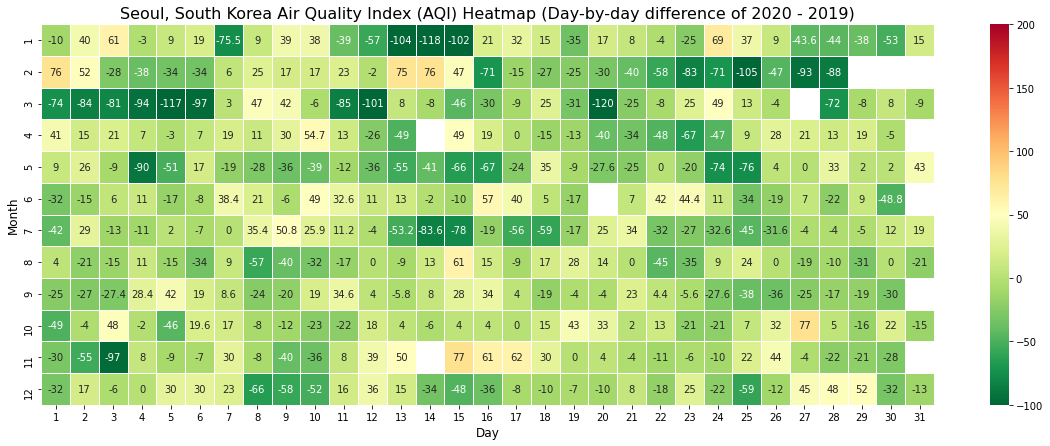

---------------------------------------------
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


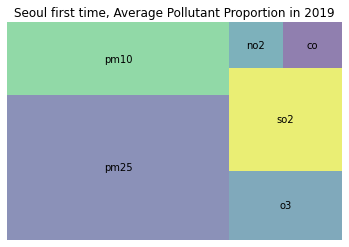

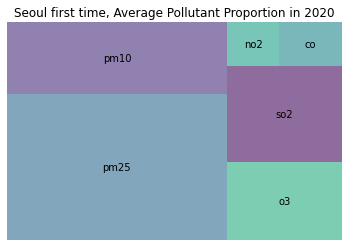

first lockdown
    City      Country AQIchange
0  Seoul  South Korea    10.28%


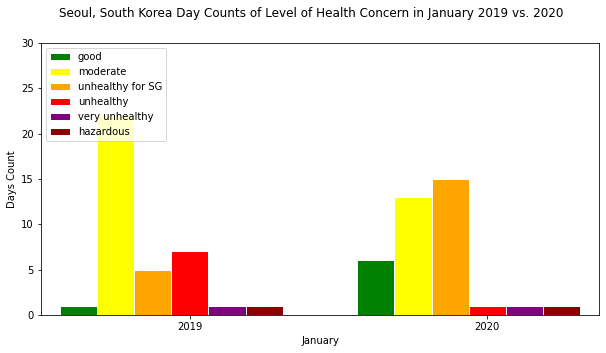

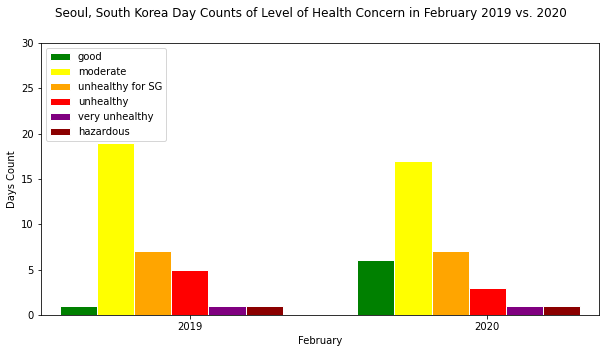

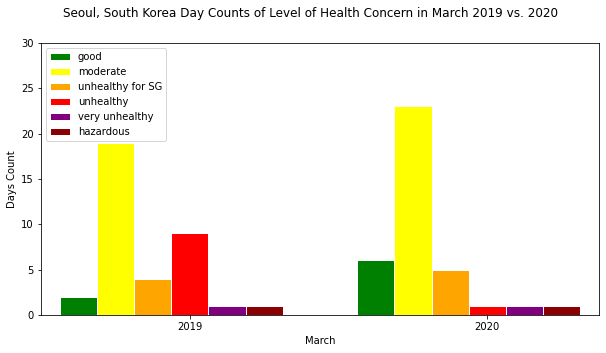

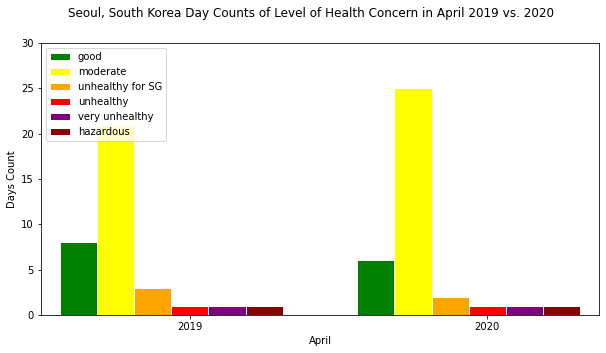

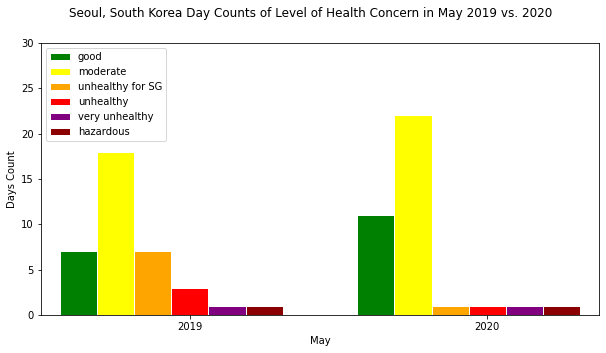

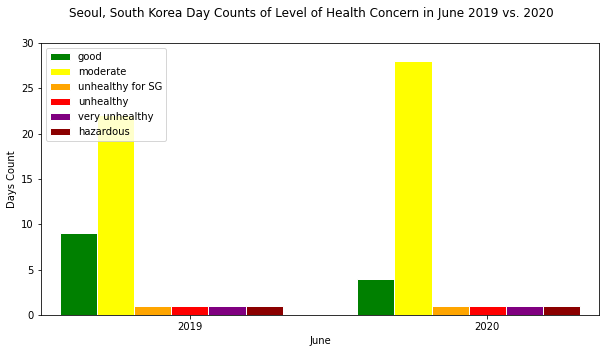

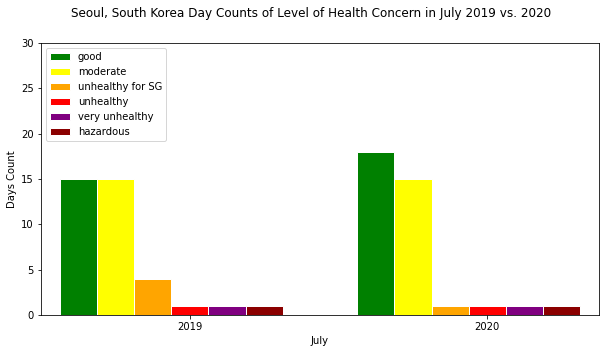

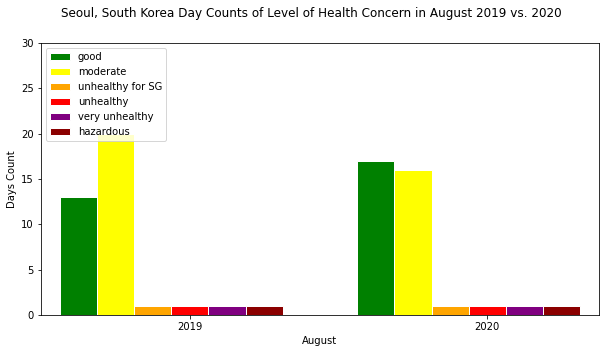

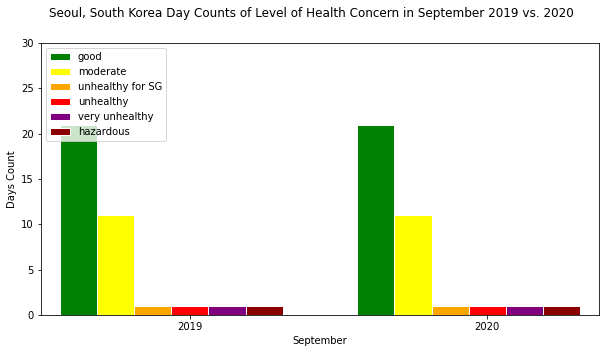

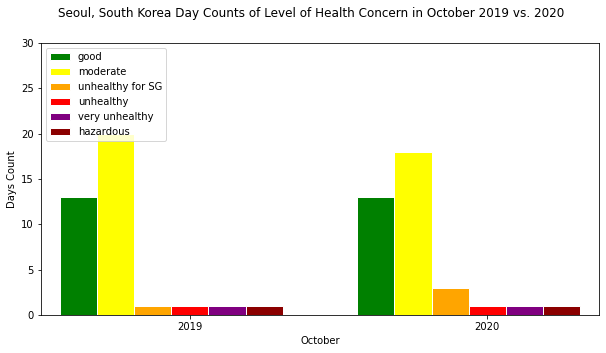

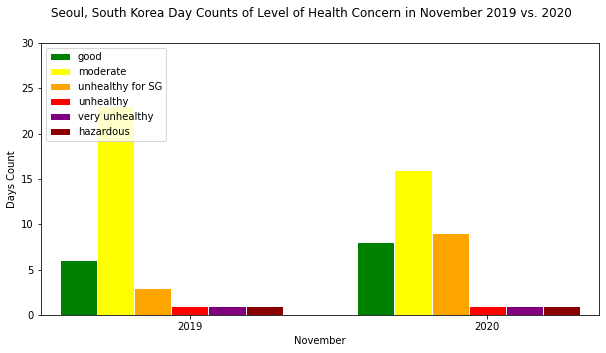

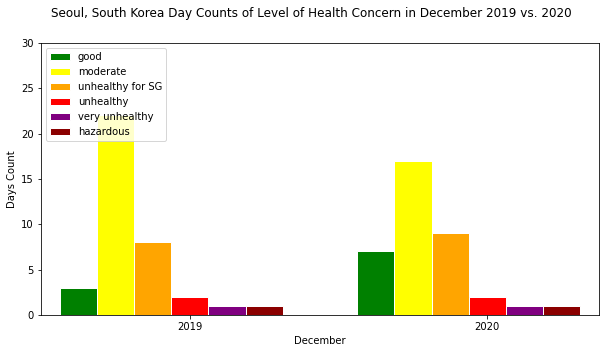

In [ ]:
lockdown_date=lockdown_dates['Seoul']
visulization(cur_city_name="Seoul",cur_country_name="South Korea",\
            cur_city_path='city_cleaned_data/seoul_AQI.csv',\
            lockdown_date=lockdown_date,save_or_not=True,save_dir='visual_generated')


### Asia - HongKong

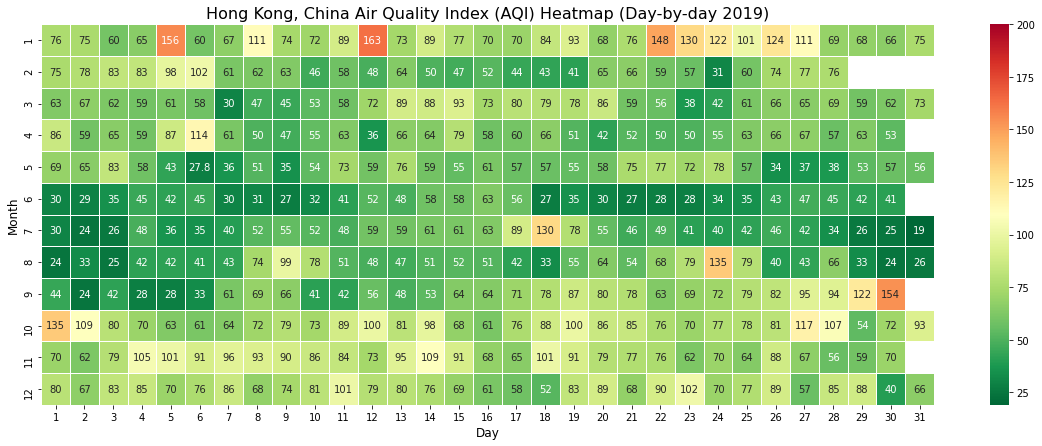

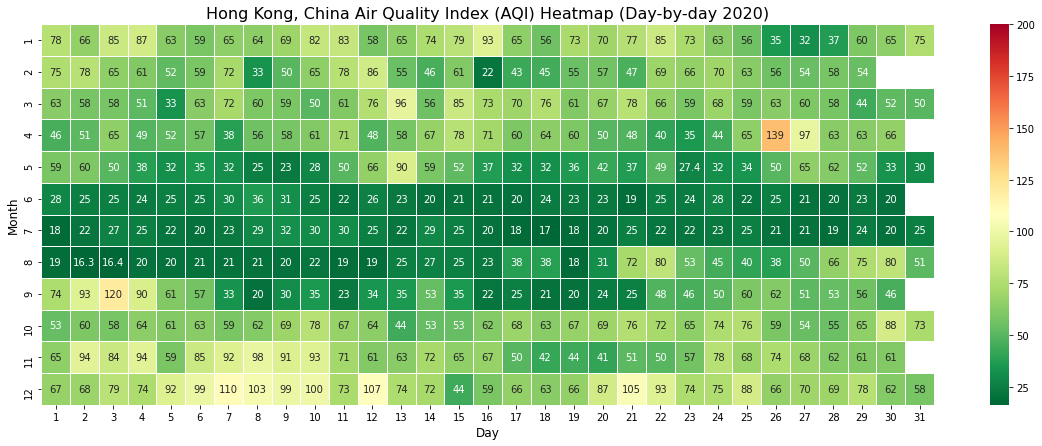

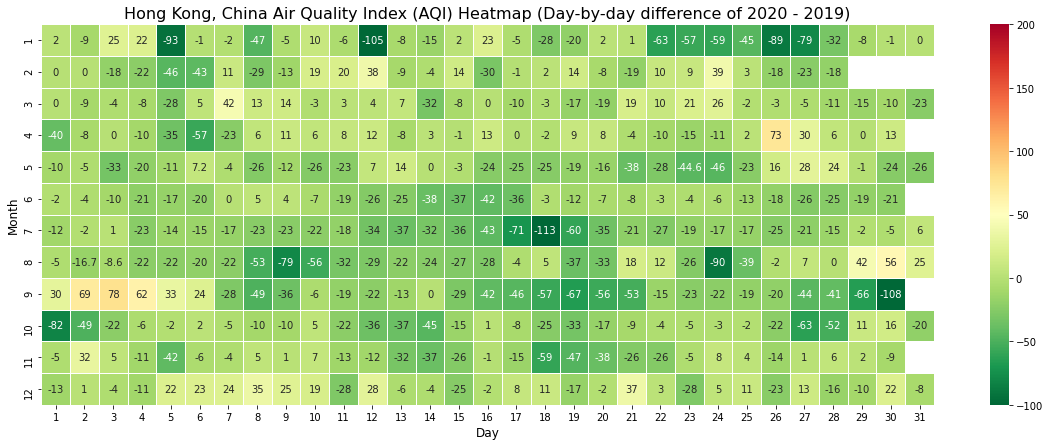

---------------------------------------------
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


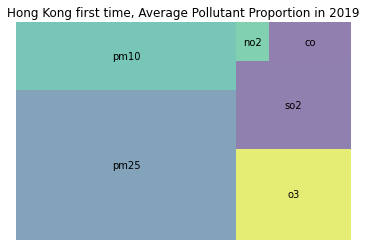

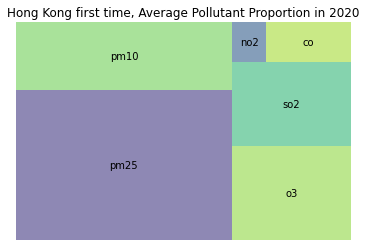

first lockdown
        City Country AQIchange
0  Hong Kong   China    18.92%


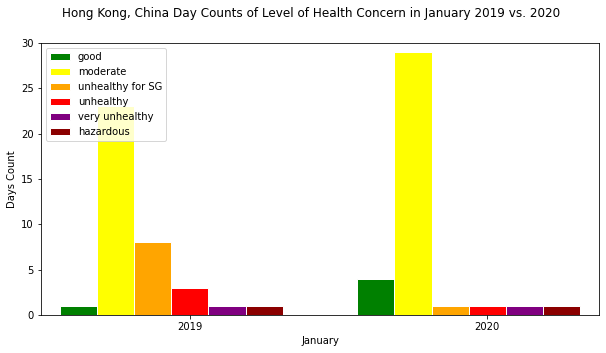

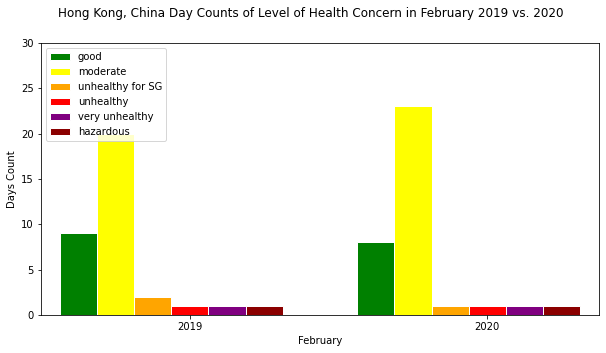

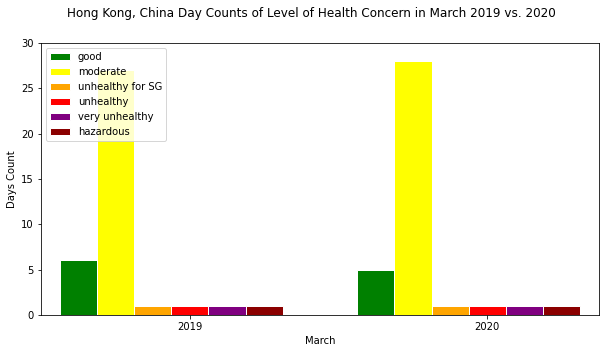

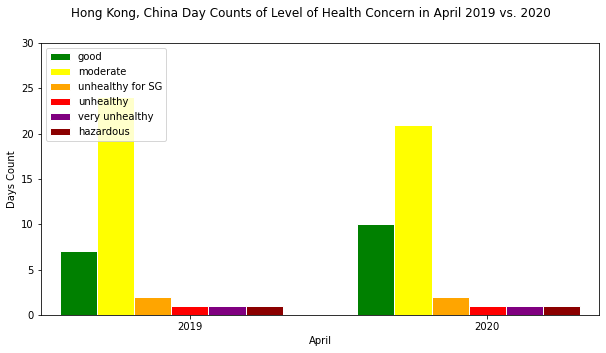

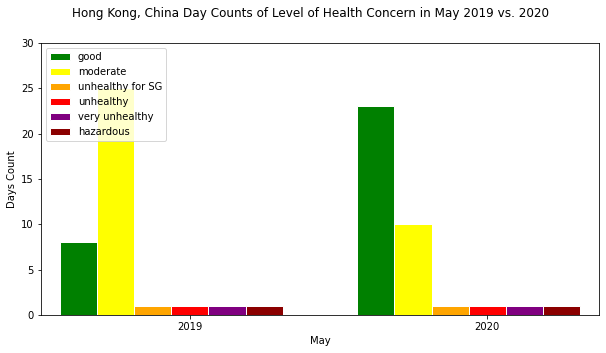

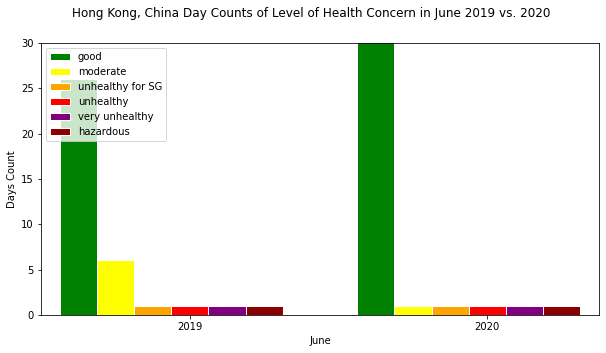

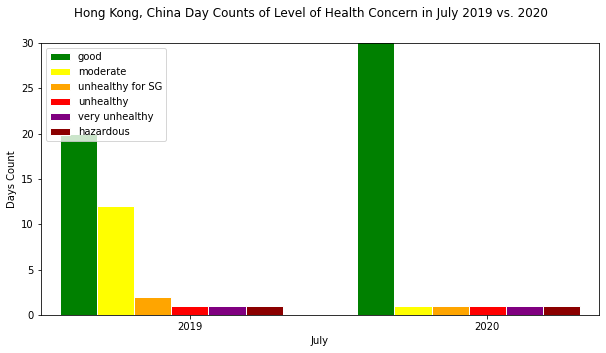

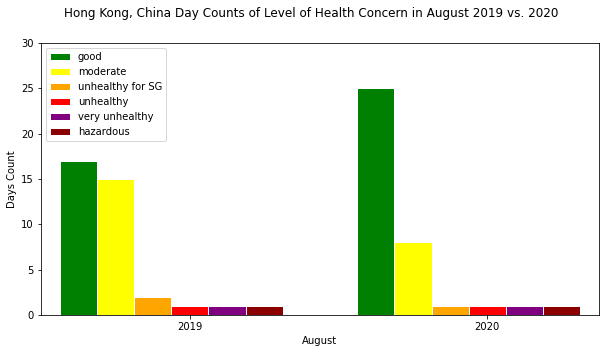

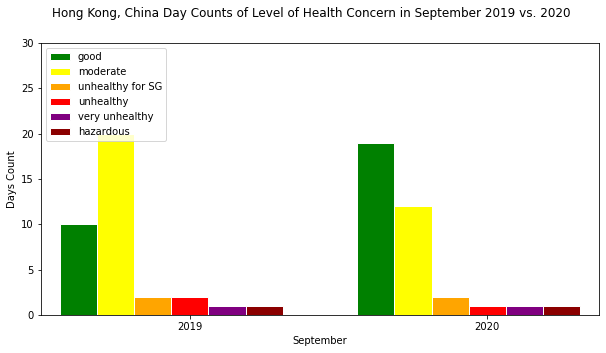

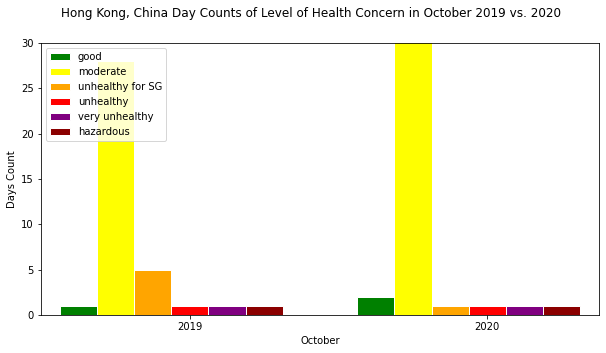

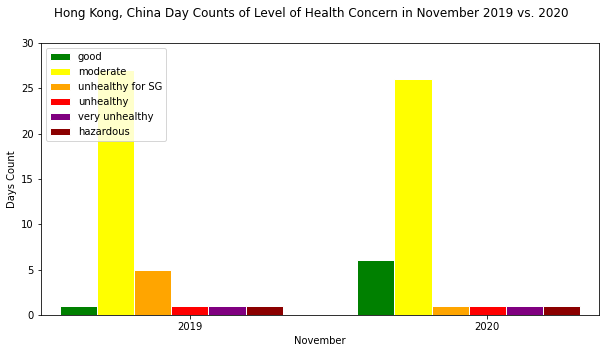

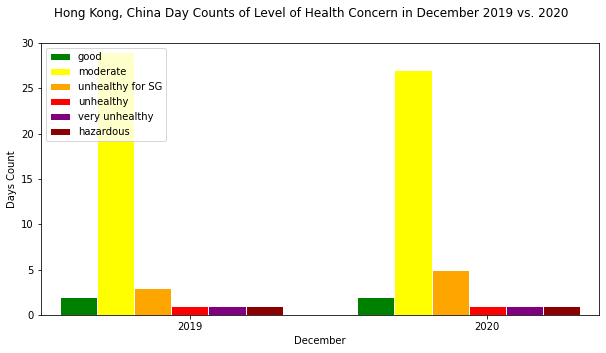

In [ ]:
lockdown_date=lockdown_dates['Hong Kong']
visulization(cur_city_name="Hong Kong",cur_country_name="China",\
            cur_city_path='city_cleaned_data/hong_kong_AQI.csv',\
            lockdown_date=lockdown_date,save_or_not=True,save_dir='visual_generated') 

### North America - NYC

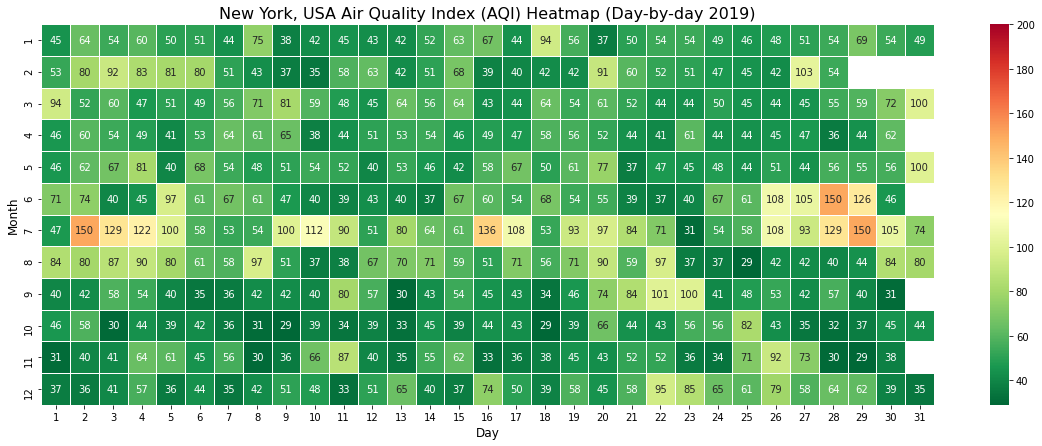

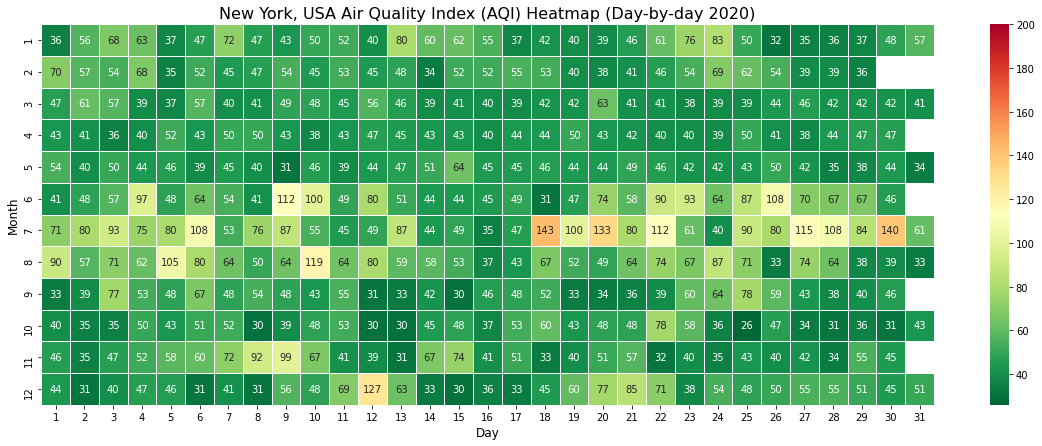

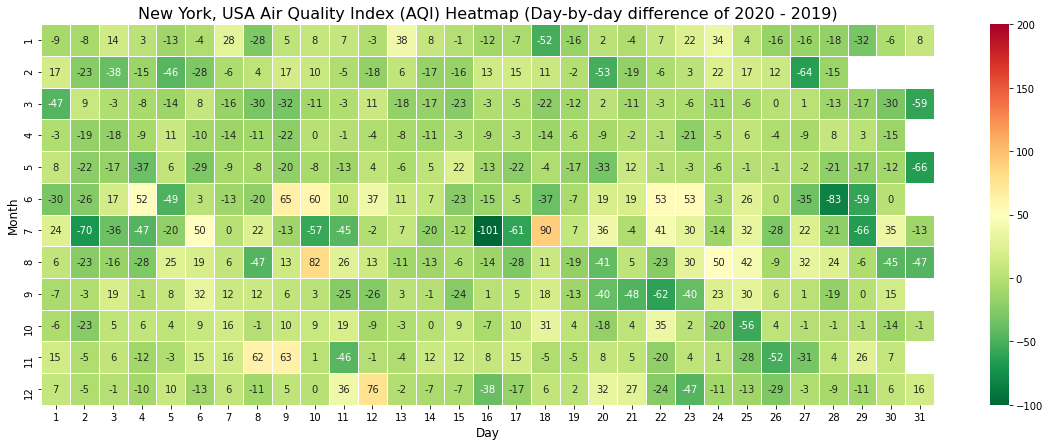

---------------------------------------------
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


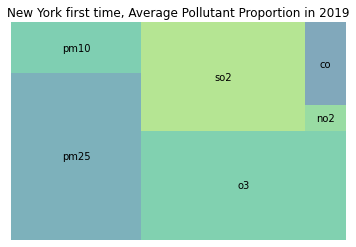

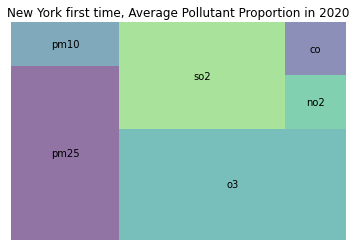

first lockdown
       City Country AQIchange
0  New York     USA    17.15%


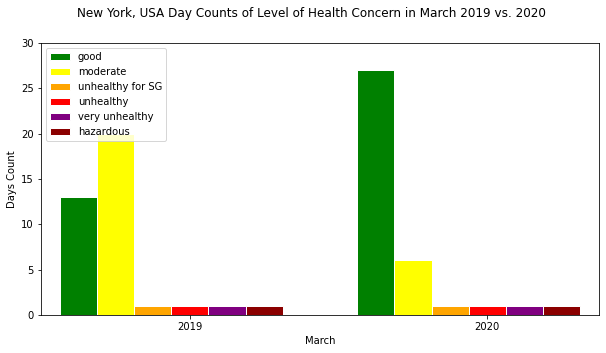

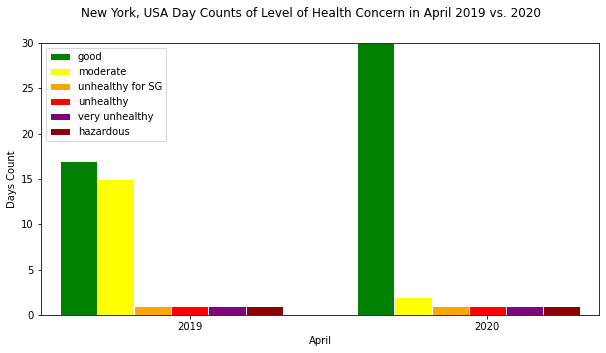

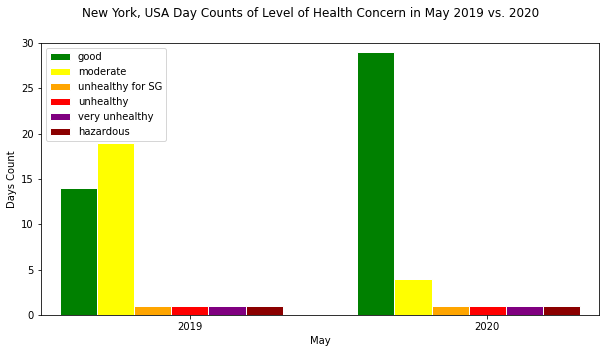

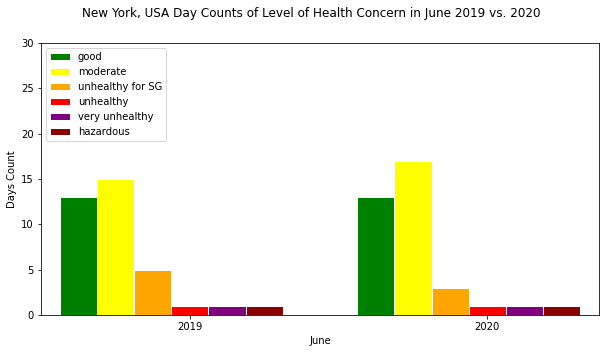

In [ ]:

lockdown_date=lockdown_dates['New York City']
visulization(cur_city_name="New York",cur_country_name="USA",\
            cur_city_path='city_cleaned_data/gnyc_AQI.csv',\
            lockdown_date=lockdown_date,save_or_not=True,save_dir='visual_generated')

### North America - Miami


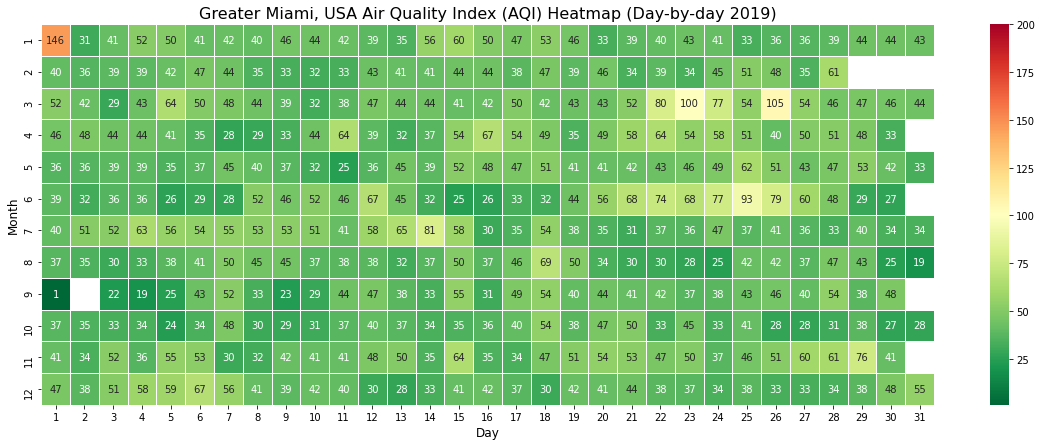

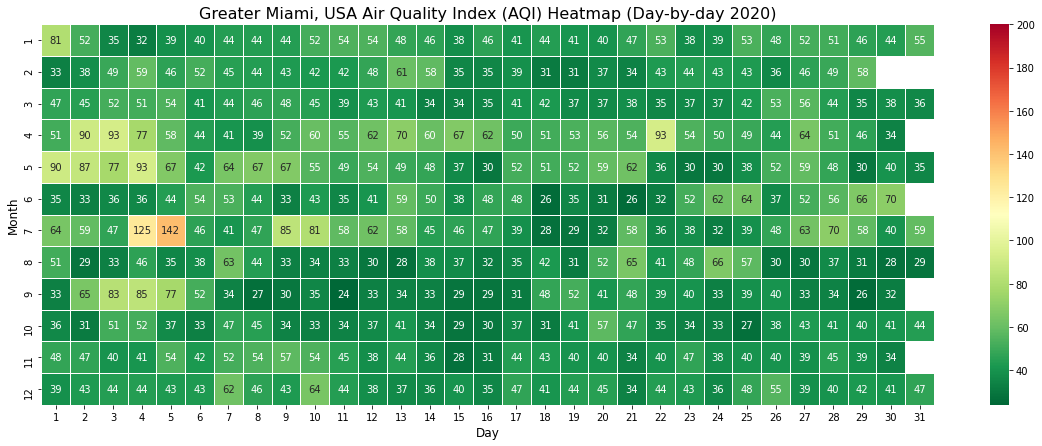

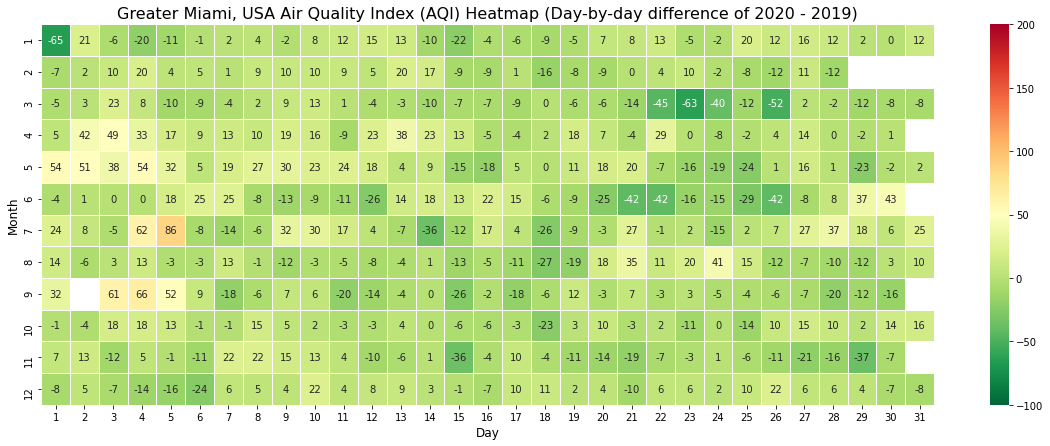

---------------------------------------------
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


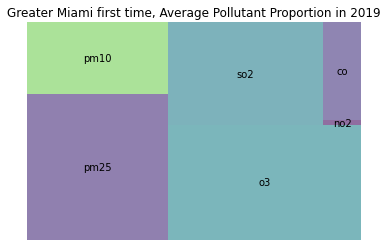

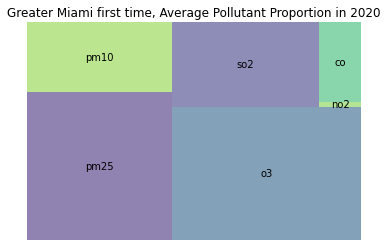

first lockdown
            City Country AQIchange
0  Greater Miami     USA   -22.52%


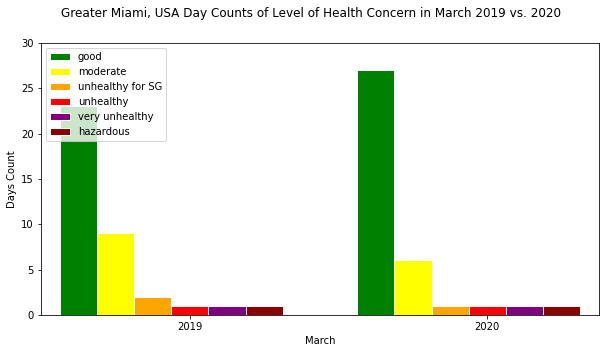

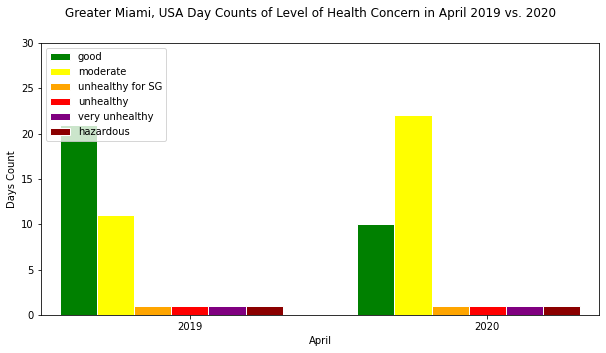

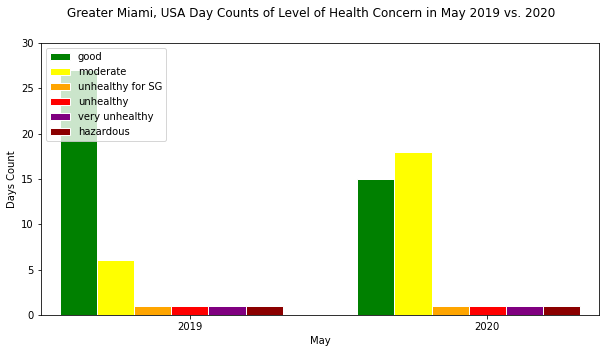

In [ ]:
# If you hope to visualize the data, just change the parameter in this cell.
lockdown_date=lockdown_dates['Greater Miami']
visulization(cur_city_name="Greater Miami",cur_country_name="USA",\
            cur_city_path='city_cleaned_data/gmia_AQI.csv',\
            lockdown_date=lockdown_date,save_or_not=True,save_dir='visual_generated') #save_or_not means whether you want to save the visualization picture to disk.
           

### North America - Los Angeles

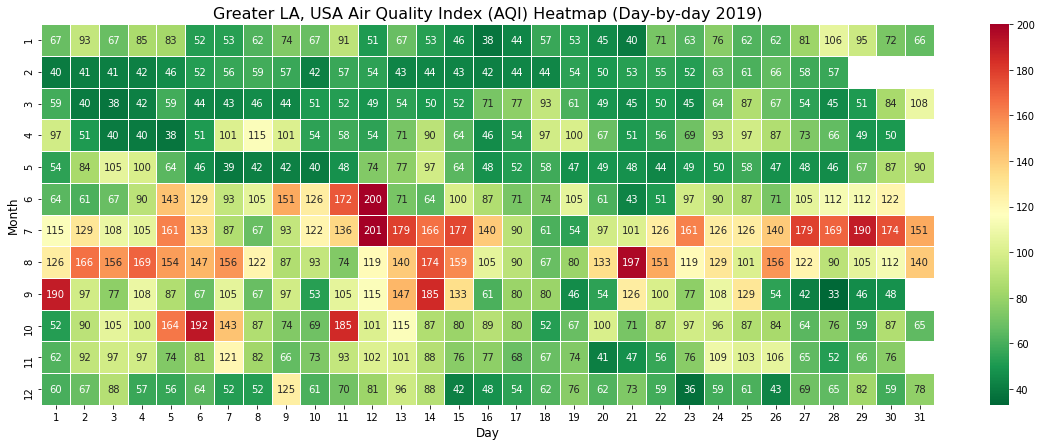

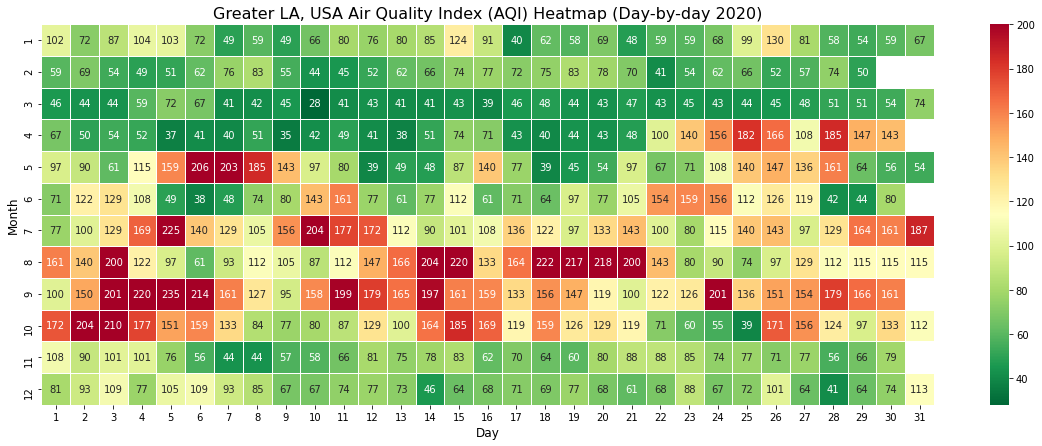

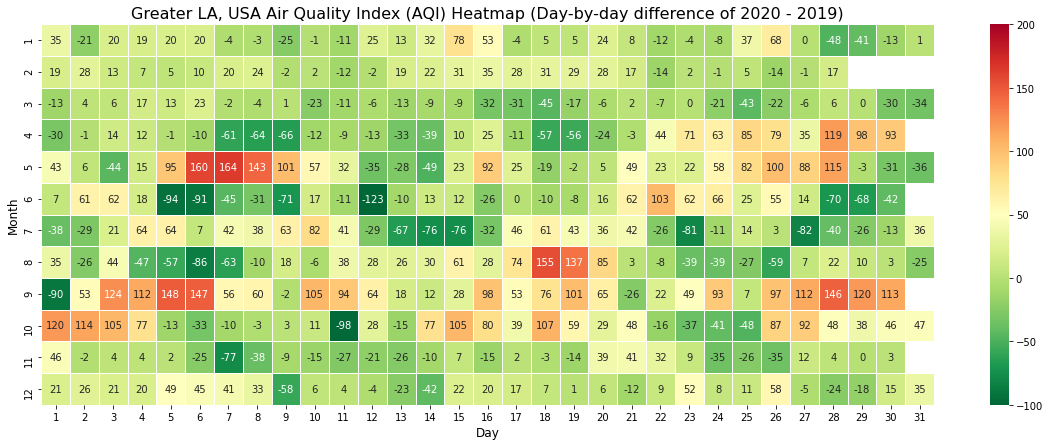

---------------------------------------------
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


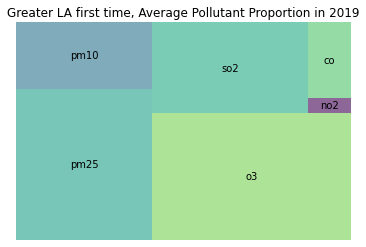

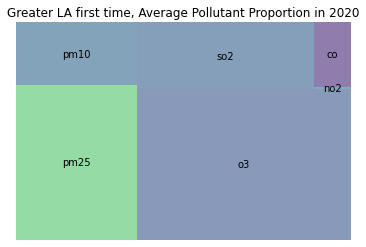

first lockdown
         City Country AQIchange
0  Greater LA     USA   -31.33%


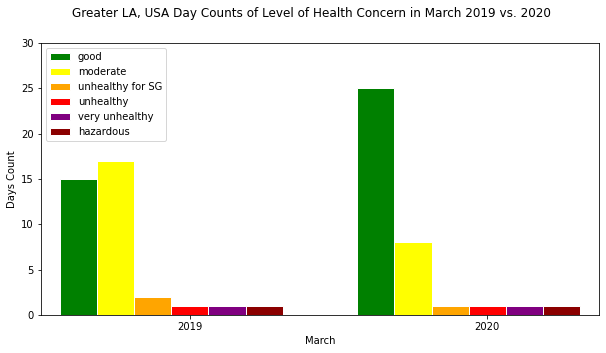

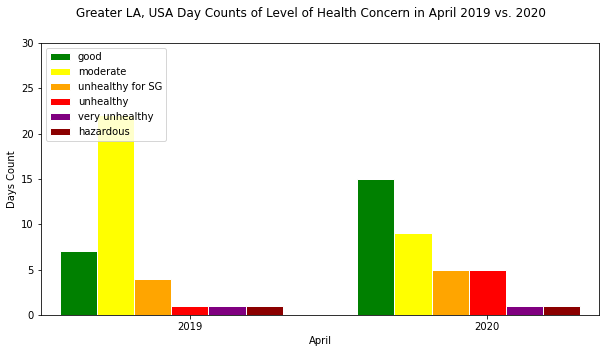

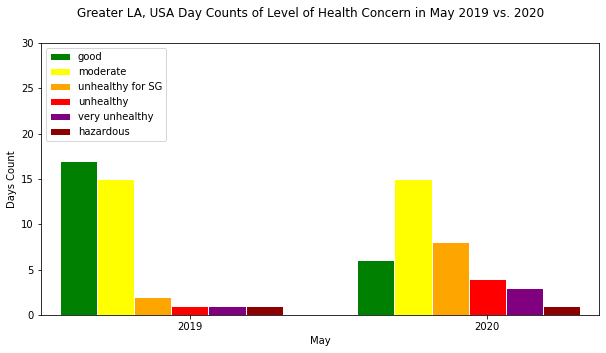

---------------------------------------------
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


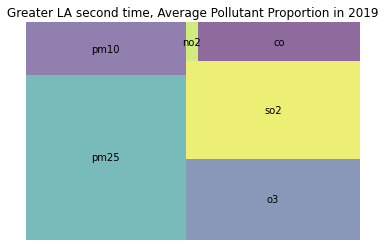

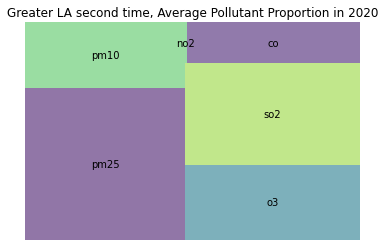

second lockdown
         City Country AQIchange
0  Greater LA     USA    -9.65%


In [ ]:
lockdown_date = lockdown_dates['Greater Los Angeles']
visulization(cur_city_name="Greater LA",cur_country_name="USA",\
            cur_city_path='city_cleaned_data/gla_AQI.csv',\
            lockdown_date=lockdown_date,save_or_not=True,save_dir='visual_generated') #save_or_not means whether you want to save the visualization picture to disk.

   

### Europea and UK - London

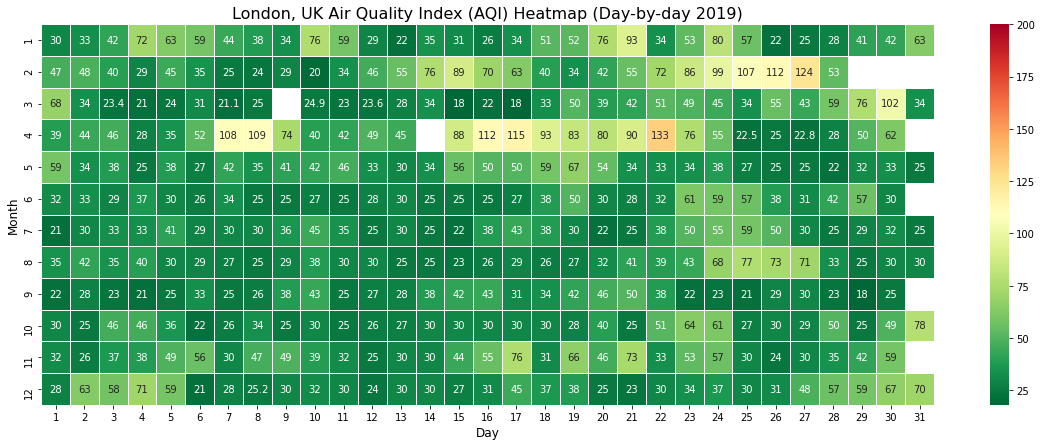

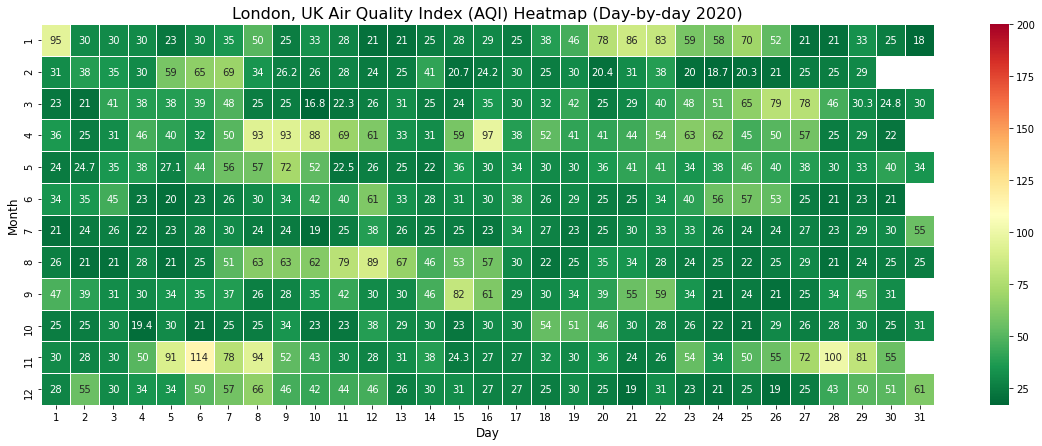

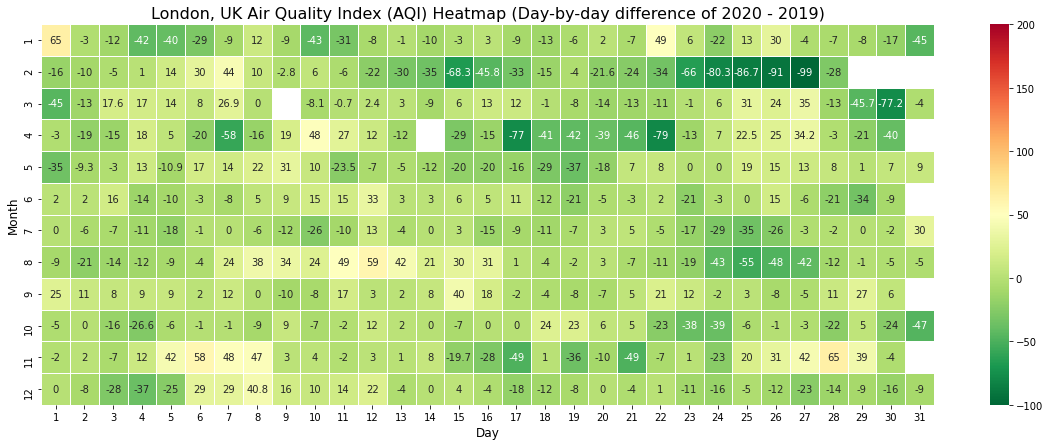

---------------------------------------------
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


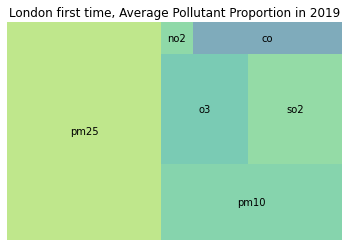

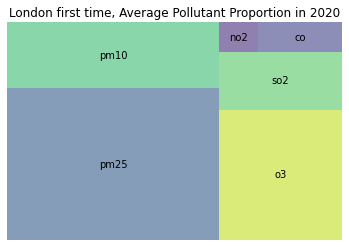

first lockdown
     City Country AQIchange
0  London      UK    14.10%


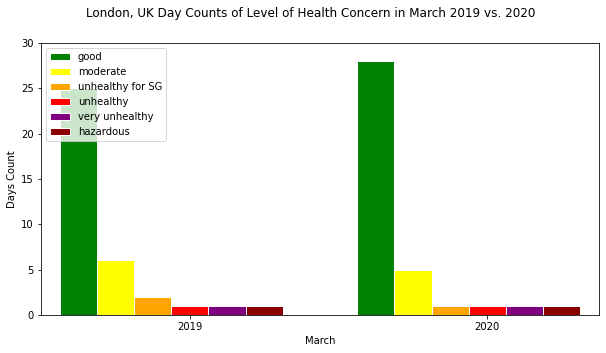

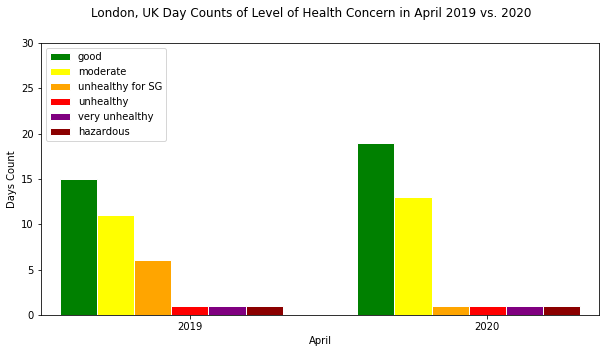

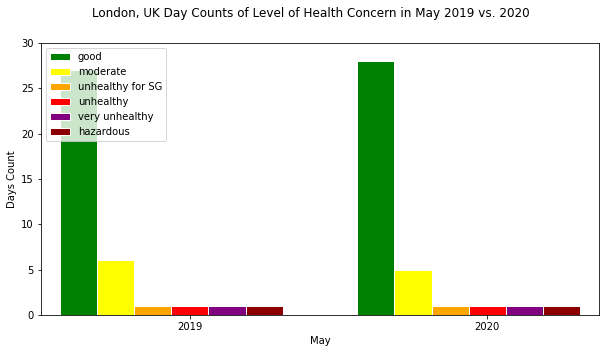

---------------------------------------------
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


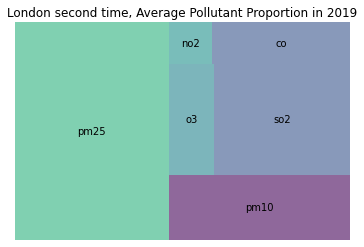

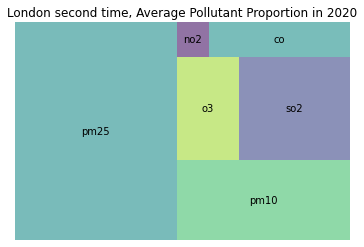

second lockdown
     City Country AQIchange
0  London      UK   -14.39%


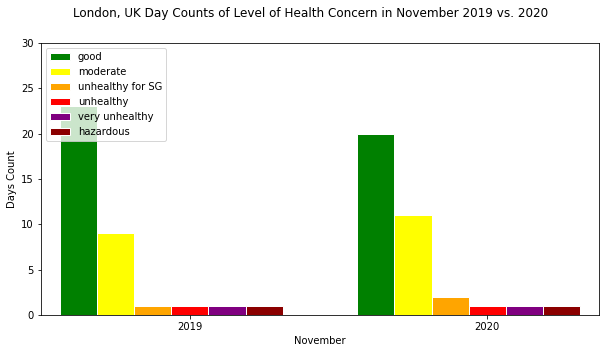

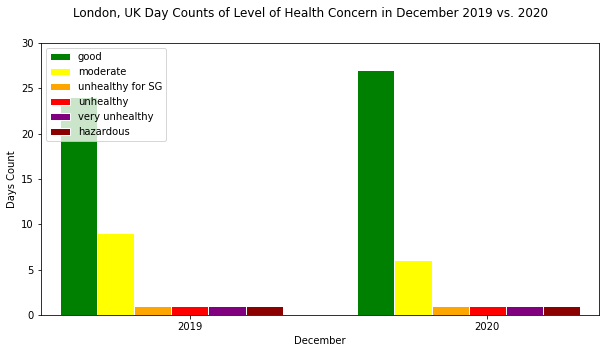

---------------------------------------------
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


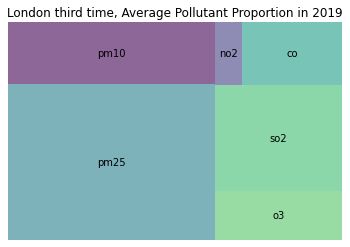

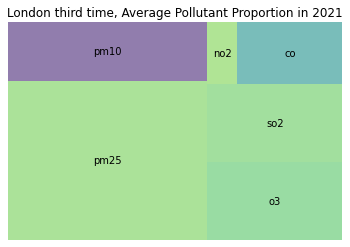

third lockdown
     City Country AQIchange
0  London      UK    14.76%


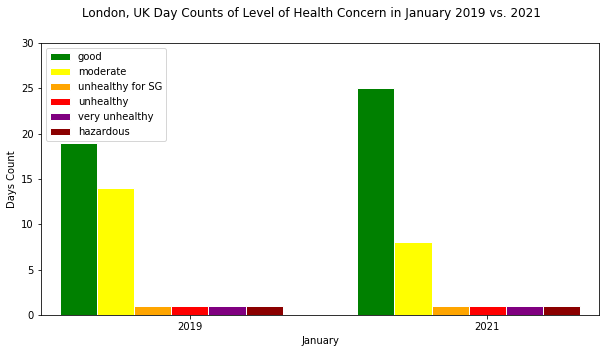

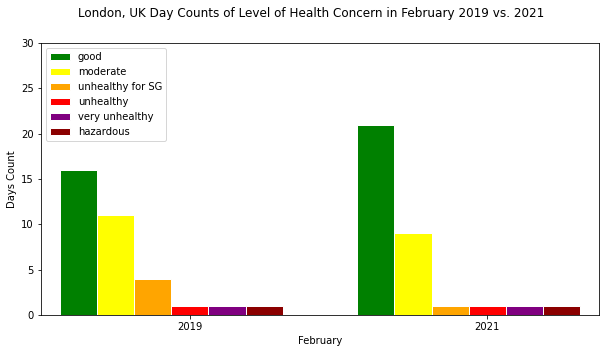

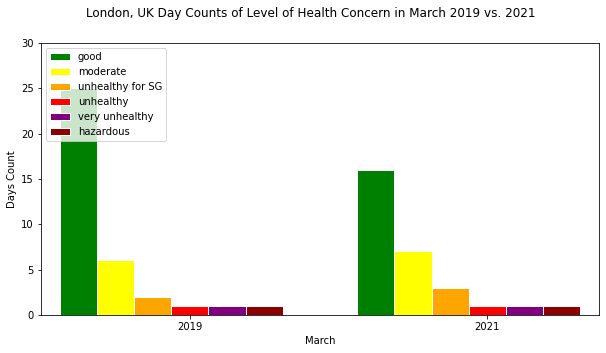

In [ ]:
lockdown_date = lockdown_dates['London']
visulization(cur_city_name="London",cur_country_name="UK",\
            cur_city_path='city_cleaned_data/london_AQI.csv',\
            lockdown_date=lockdown_date,save_or_not=True,save_dir='visual_generated') #save_or_not means whether you want to save the visualization picture to disk.


### Europea - Milan


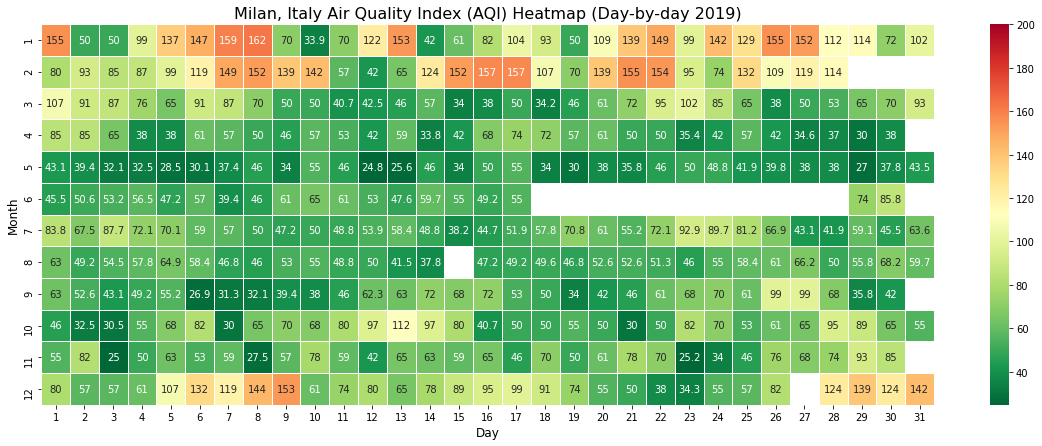

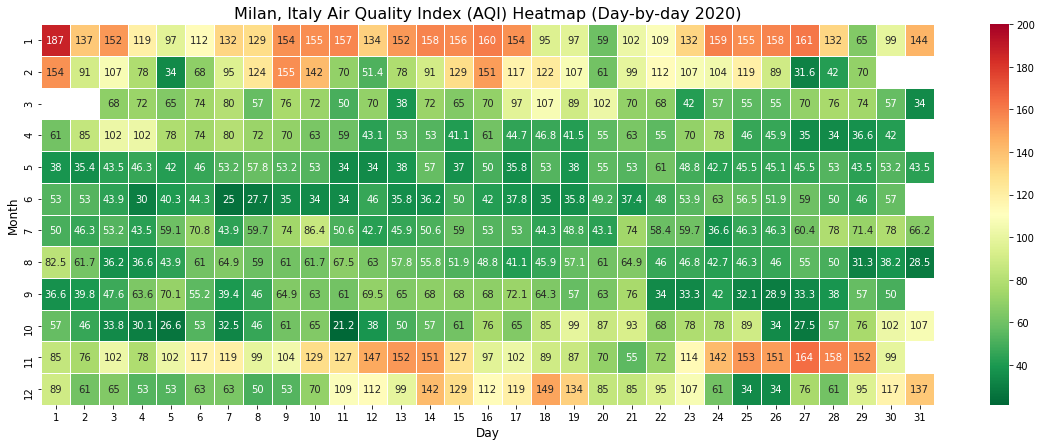

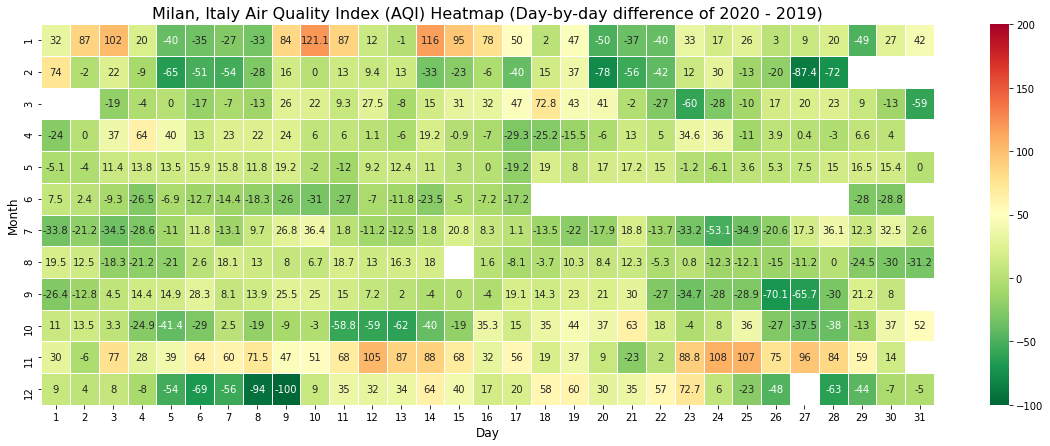

---------------------------------------------
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


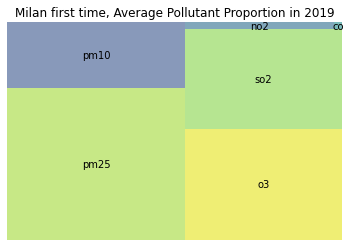

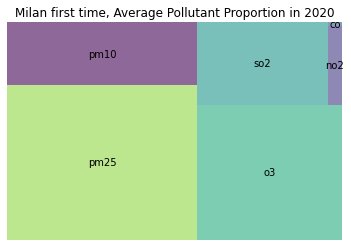

first lockdown
    City Country AQIchange
0  Milan   Italy   -14.85%


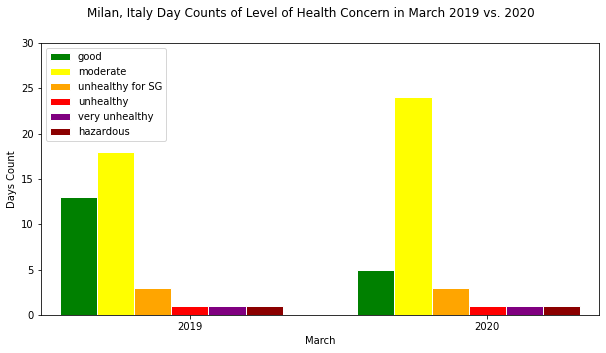

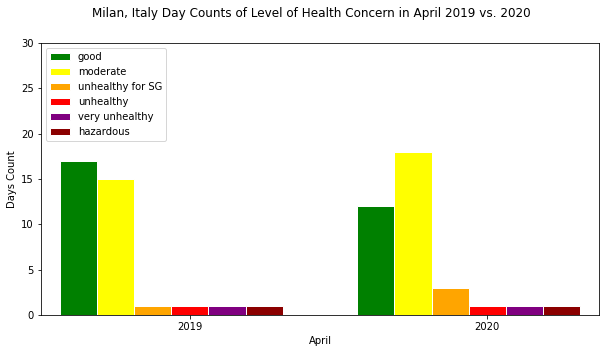

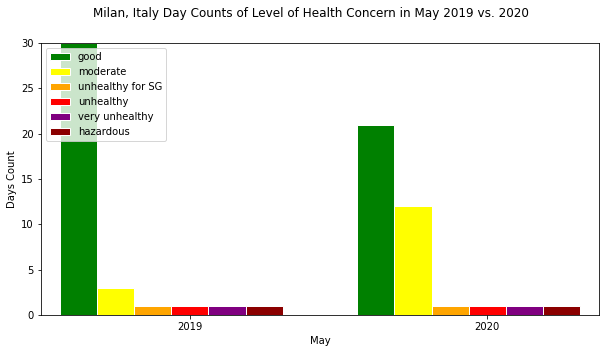

In [ ]:
lockdown_date = lockdown_dates['Milan']
visulization(cur_city_name="Milan",cur_country_name="Italy",\
            cur_city_path='city_cleaned_data/milan_AQI.csv',\
            lockdown_date=lockdown_date,save_or_not=True,save_dir='visual_generated') #save_or_not means whether you want to save the visualization picture to disk.


### Europea - Rome 

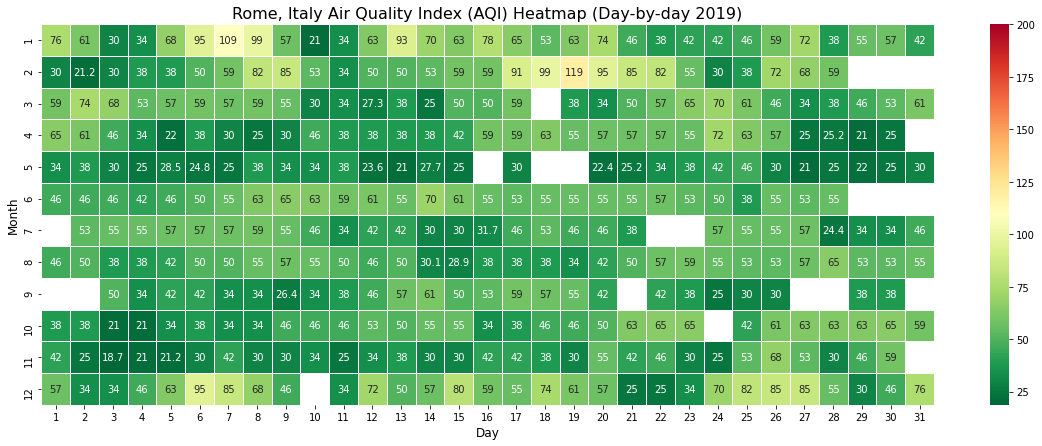

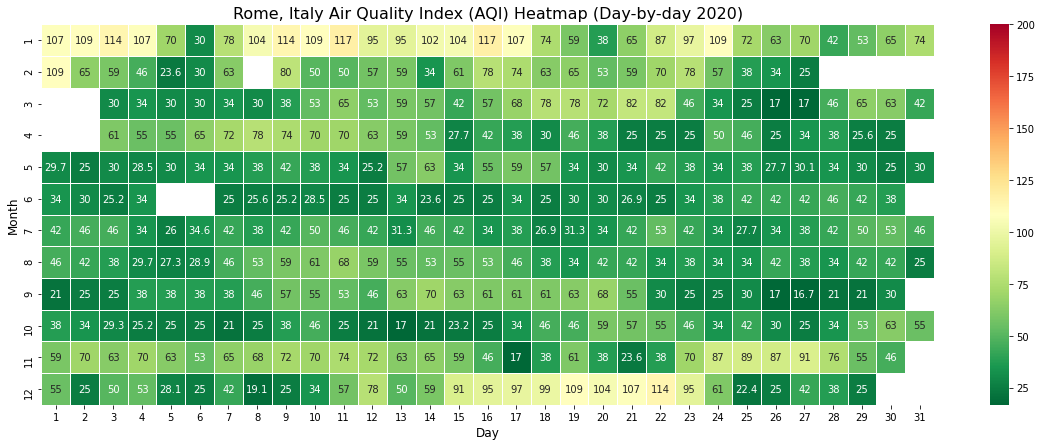

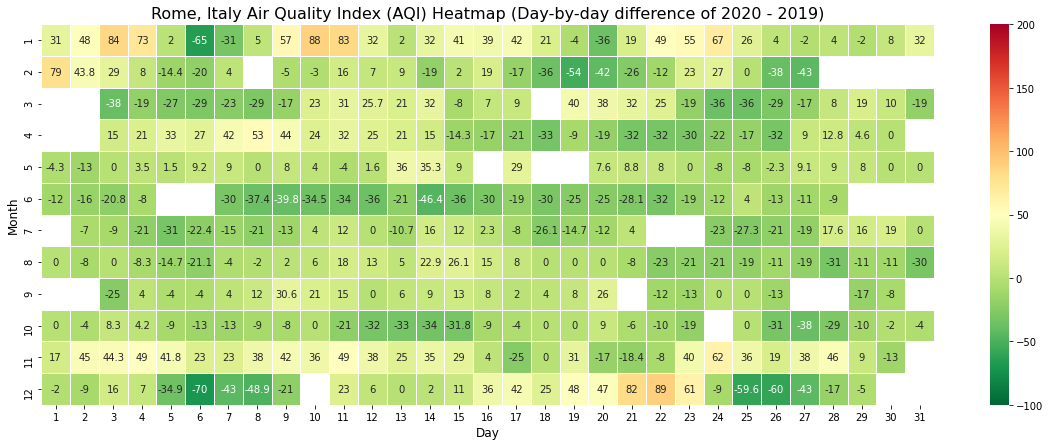

---------------------------------------------
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


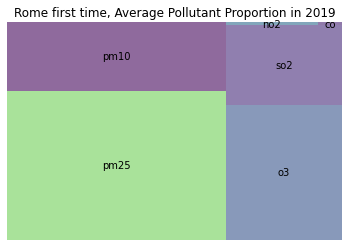

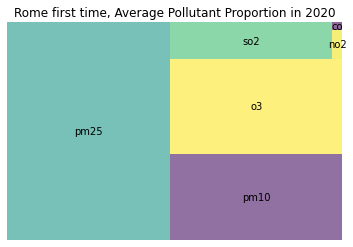

first lockdown
   City Country AQIchange
0  Rome   Italy    -7.74%


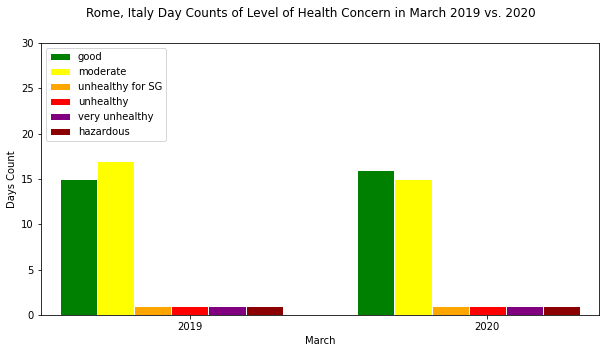

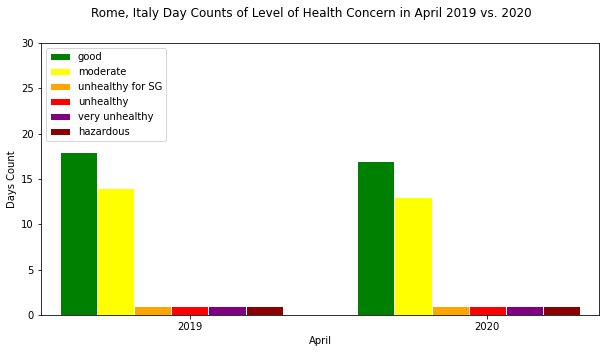

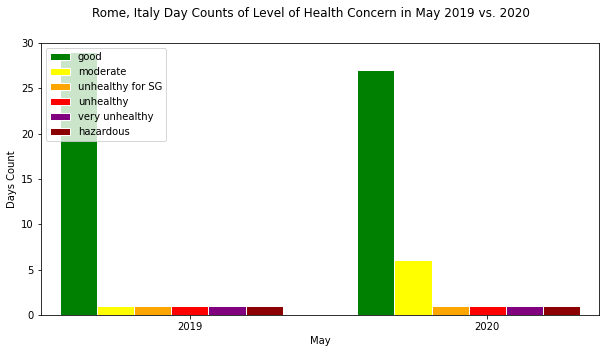

In [ ]:
lockdown_date = lockdown_dates['Rome']
visulization(cur_city_name="Rome",cur_country_name="Italy",\
            cur_city_path='city_cleaned_data/rome_AQI.csv',\
            lockdown_date=lockdown_date,save_or_not=True,save_dir='visual_generated') #save_or_not means whether you want to save the visualization picture to disk.


### Africa - Johannesburg

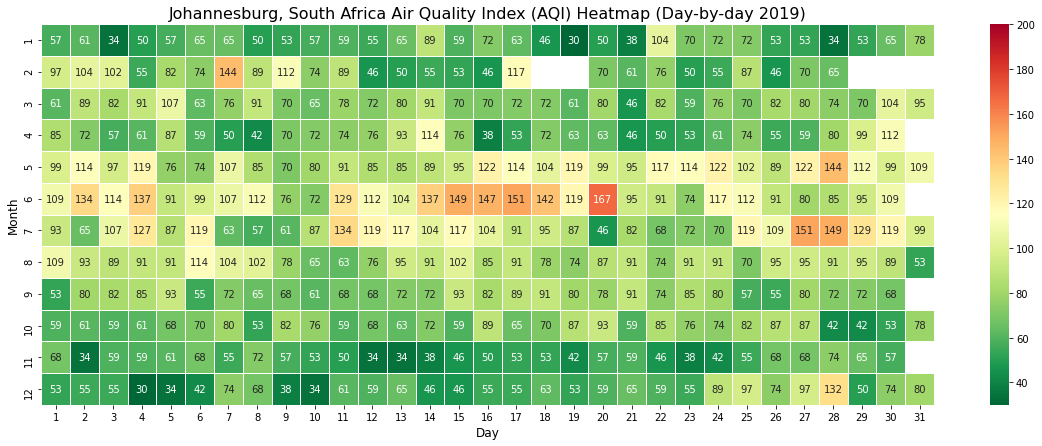

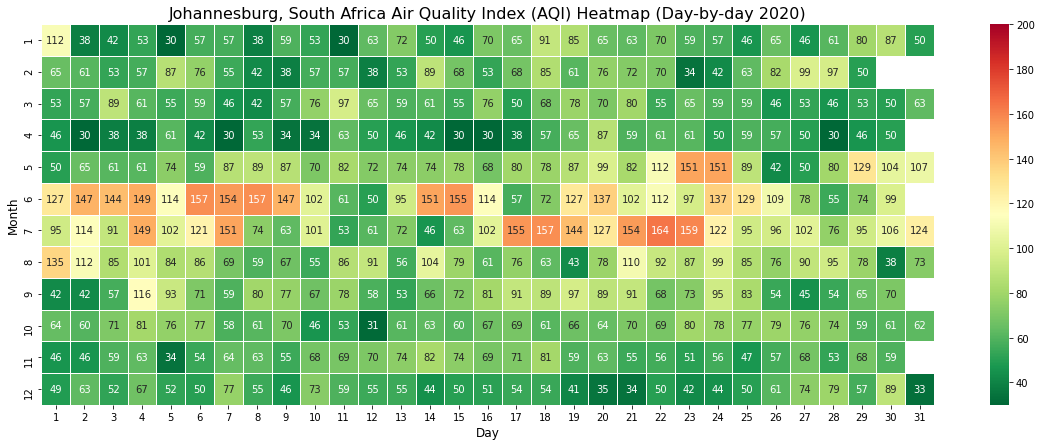

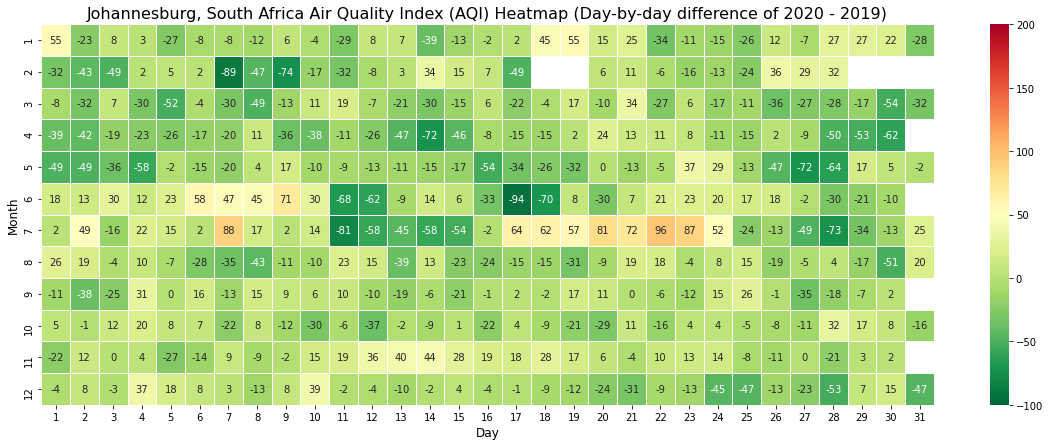

---------------------------------------------
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


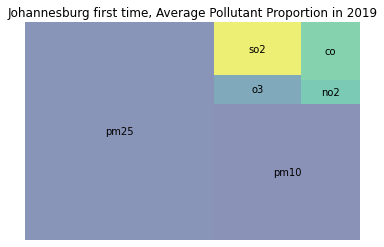

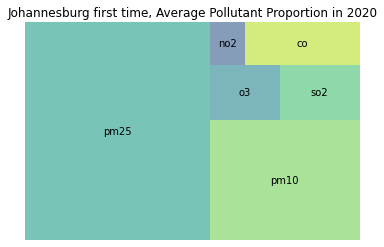

first lockdown
           City       Country AQIchange
0  Johannesburg  South Africa    23.07%


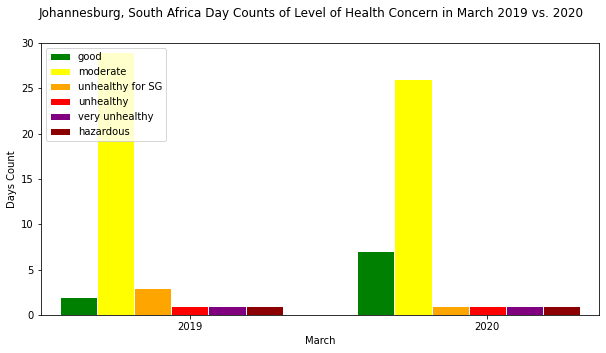

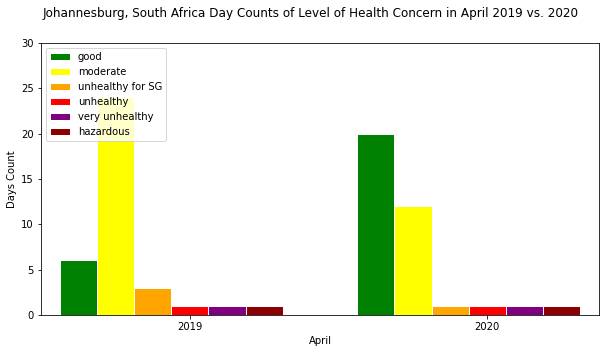

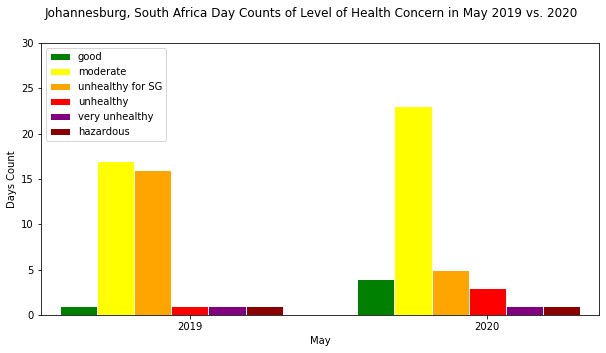

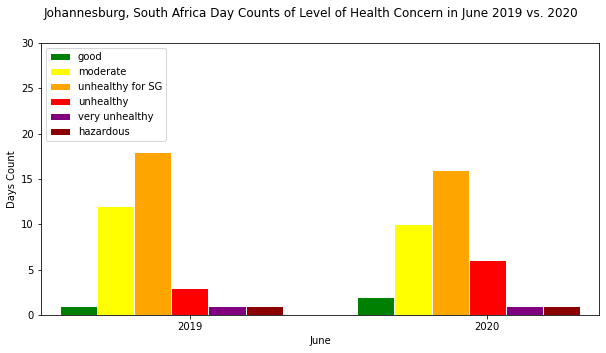

In [ ]:
lockdown_date = lockdown_dates['Johannesburg']
visulization(cur_city_name="Johannesburg",cur_country_name="South Africa",\
            cur_city_path='city_cleaned_data/johannesburg_AQI.csv',\
            lockdown_date=lockdown_date,save_or_not=True,save_dir='visual_generated') #save_or_not means whether you want to save the visualization picture to disk.


### South America - Sao_Paulo


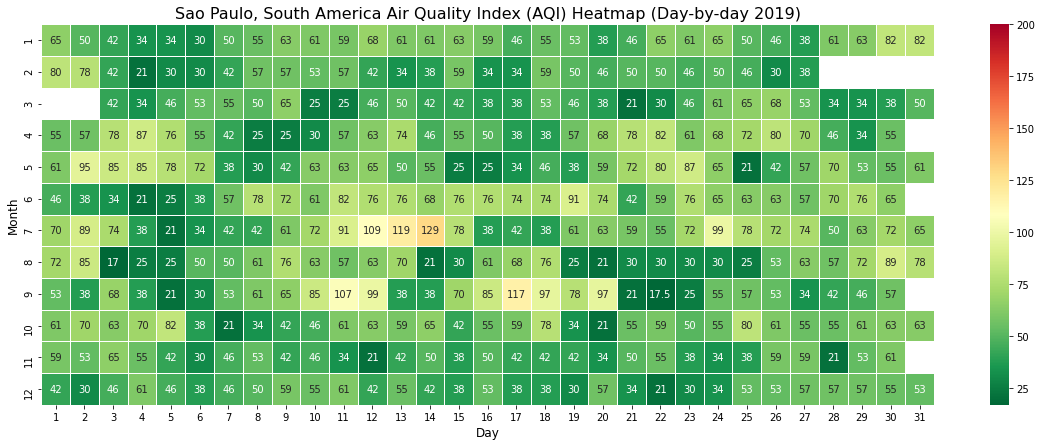

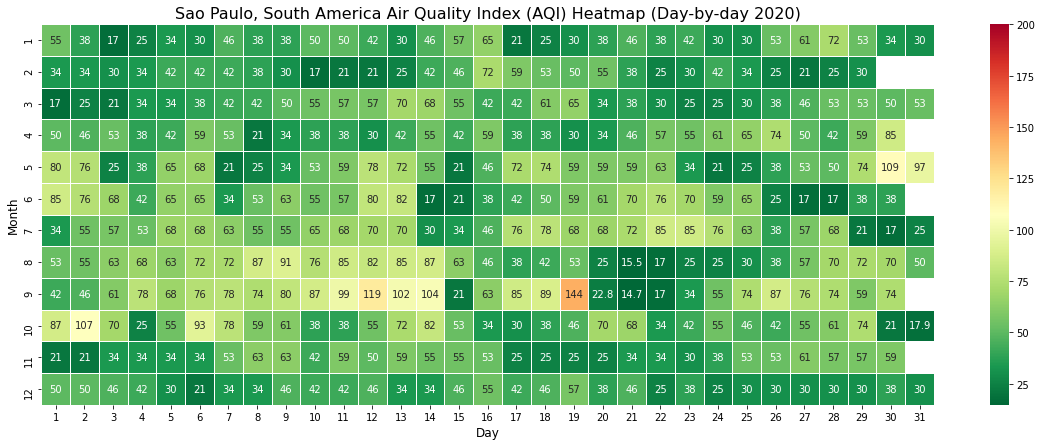

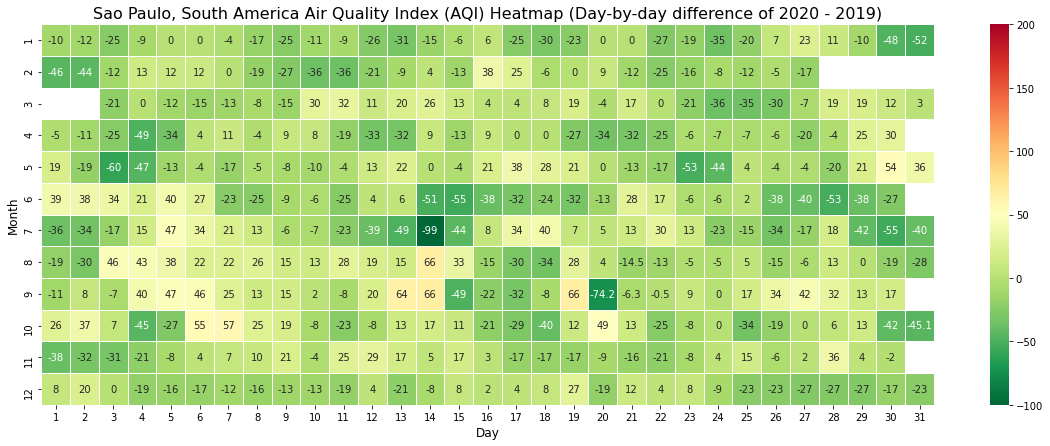

---------------------------------------------
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


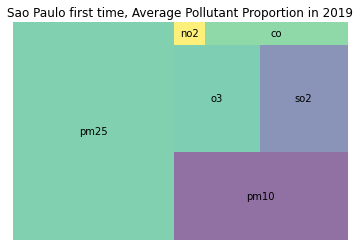

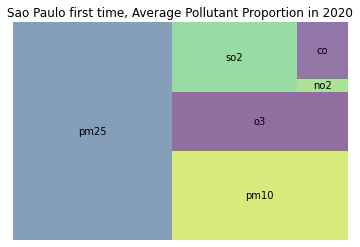

first lockdown
        City        Country AQIchange
0  Sao Paulo  South America     7.41%


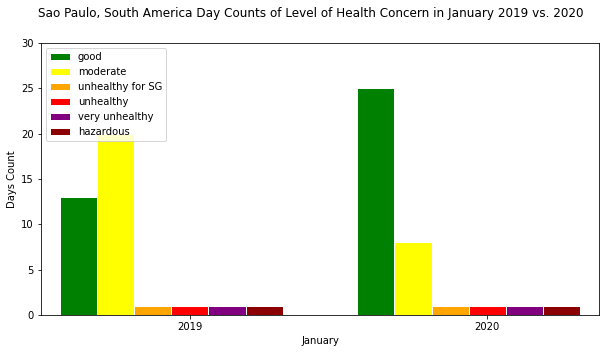

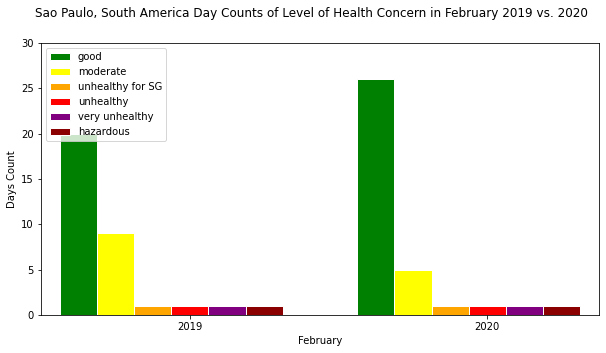

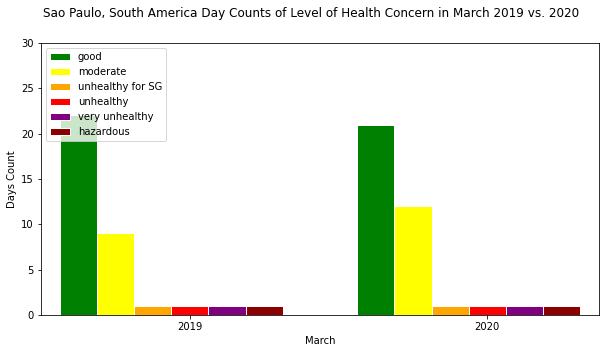

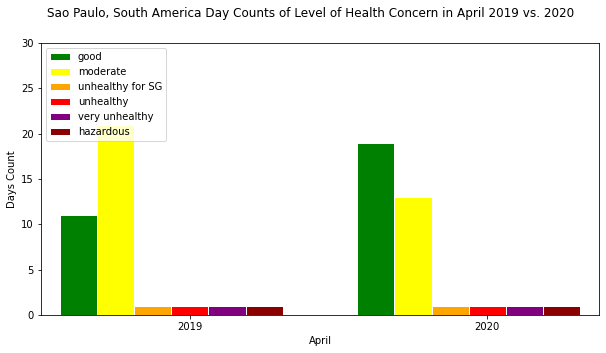

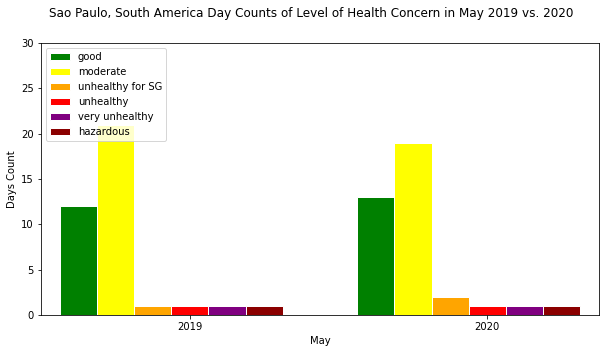

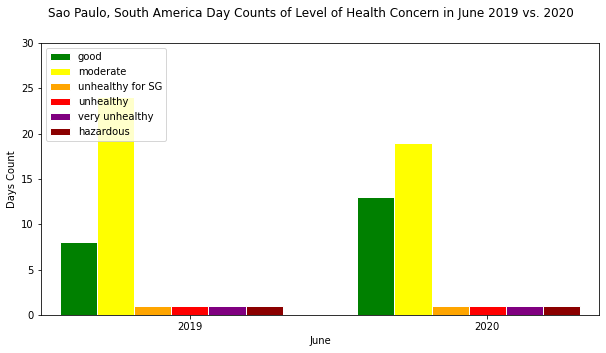

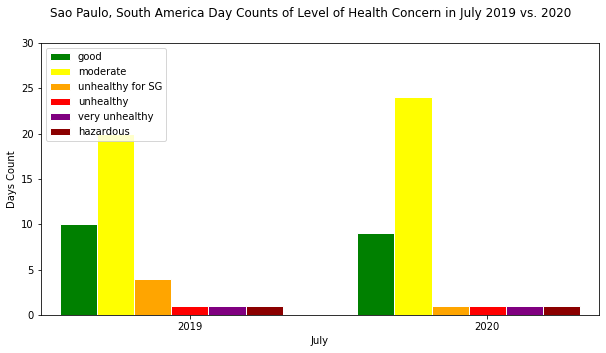

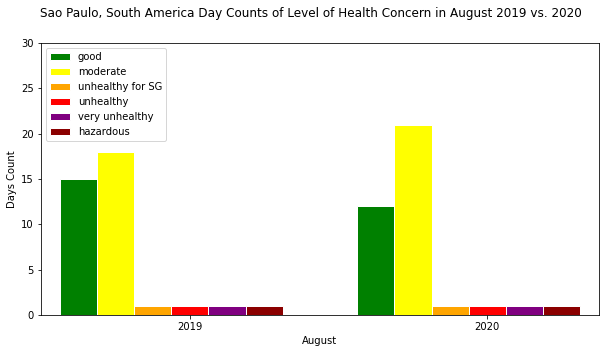

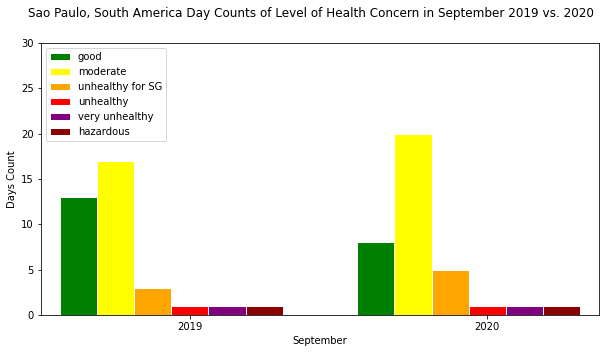

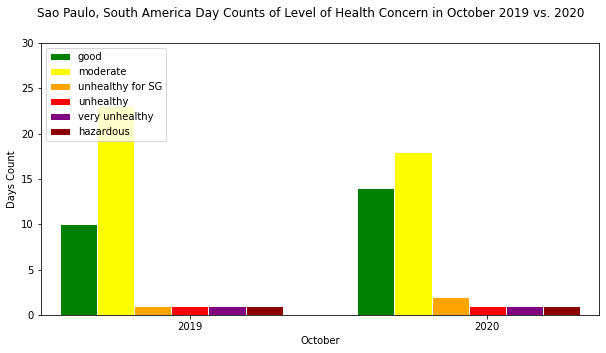

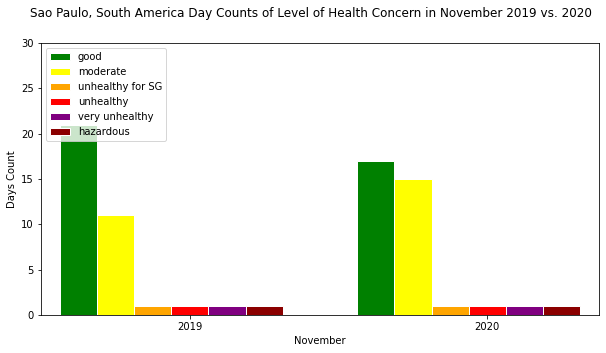

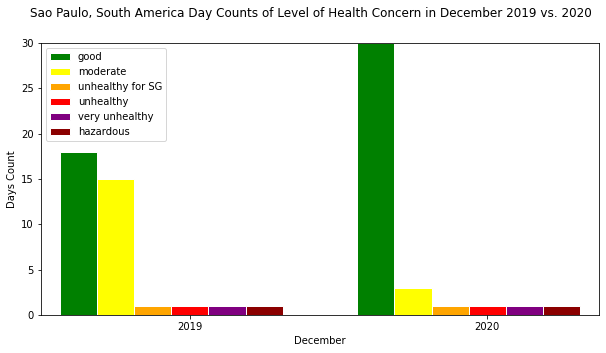

In [ ]:
lockdown_date = lockdown_dates['Sao Paulo']
visulization(cur_city_name="Sao Paulo",cur_country_name="South America",\
            cur_city_path='city_cleaned_data/sao_paulo_AQI.csv',\
            lockdown_date=lockdown_date,save_or_not=True,save_dir='visual_generated') #save_or_not means whether you want to save the visualization picture to disk.


### Australia - Sydney

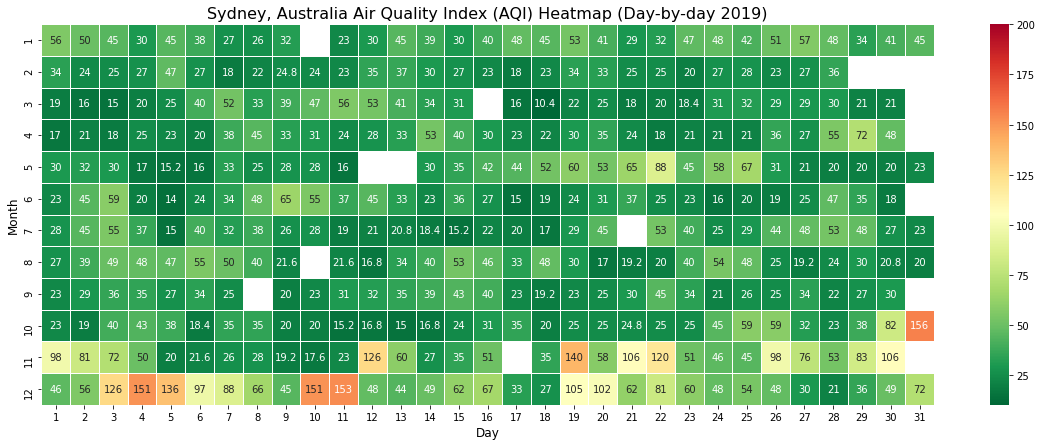

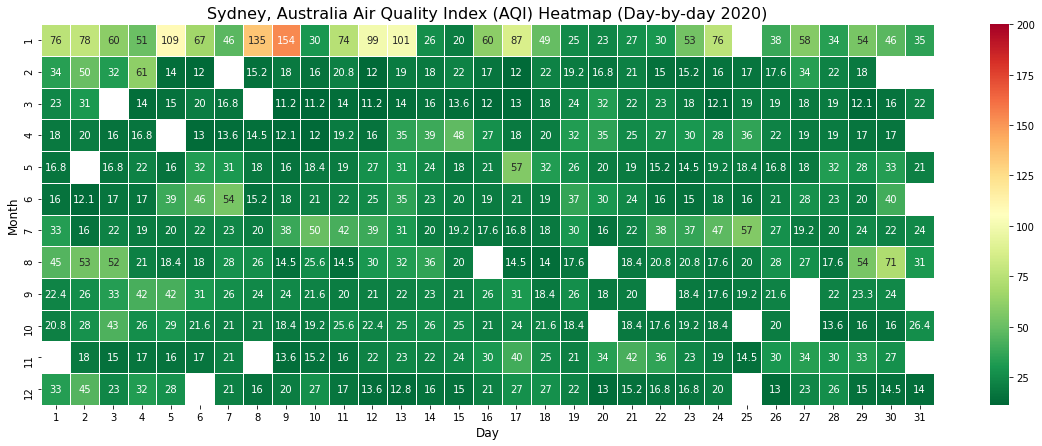

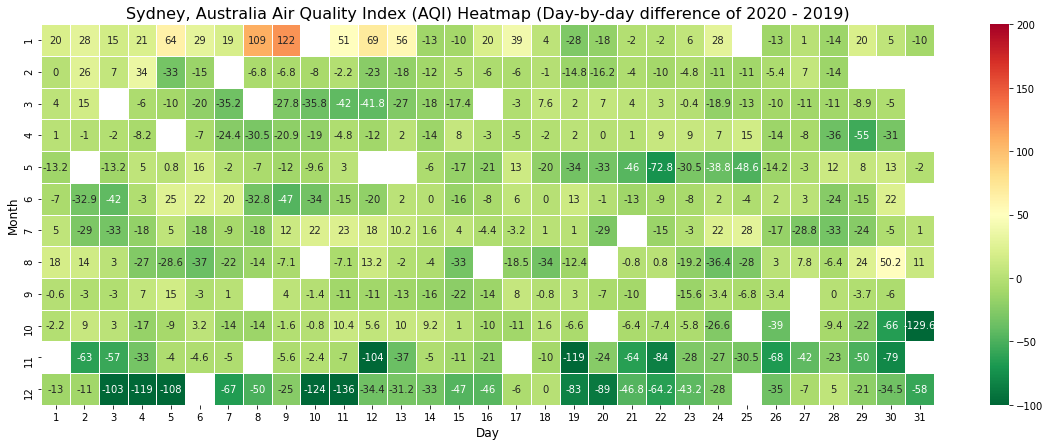

---------------------------------------------
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


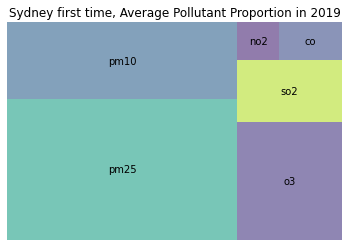

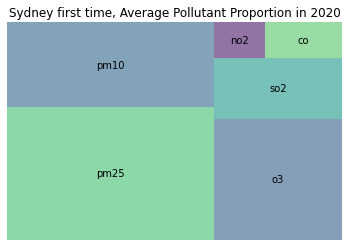

first lockdown
     City    Country AQIchange
0  Sydney  Australia    30.80%


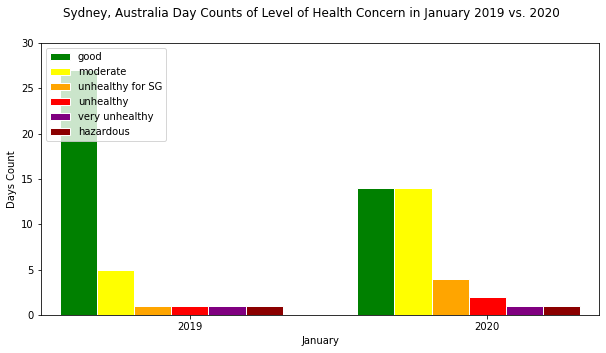

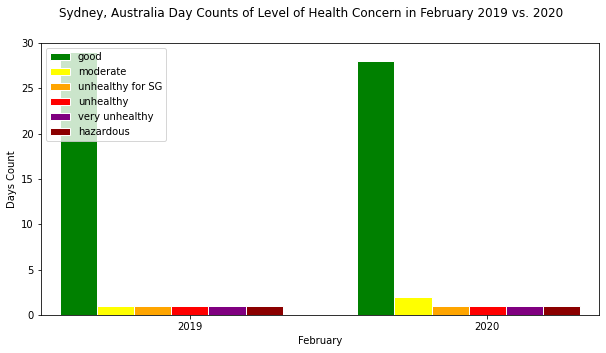

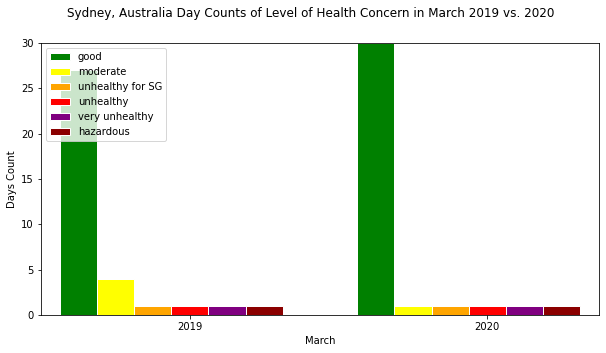

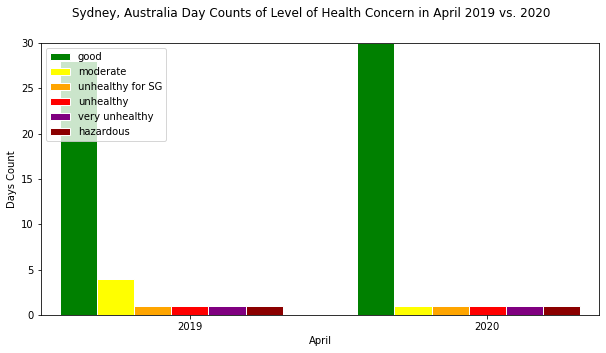

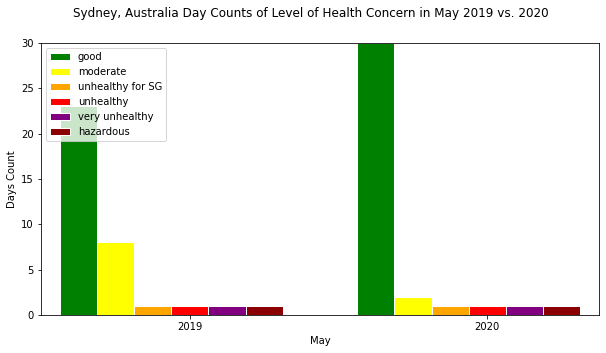

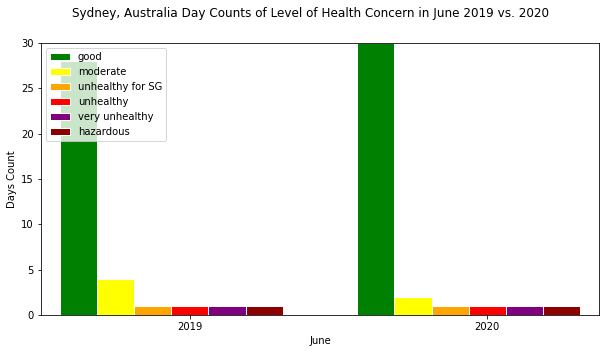

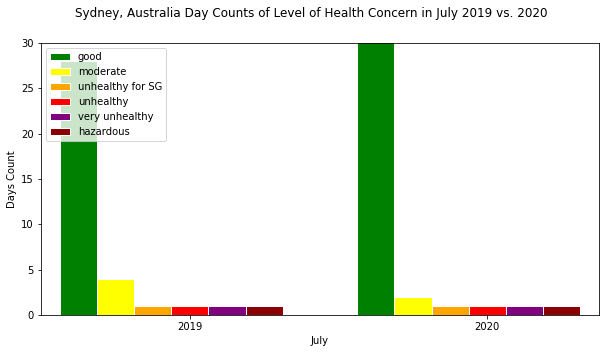

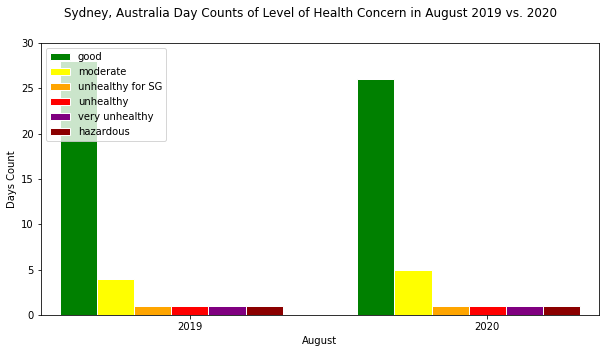

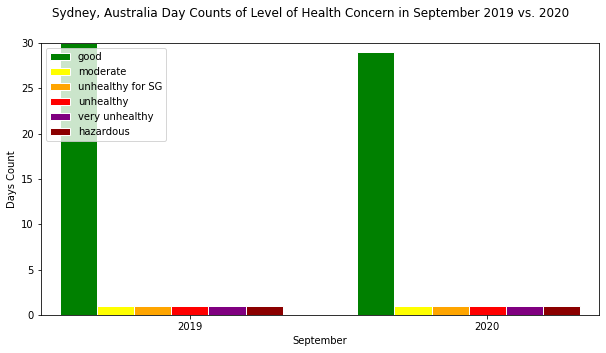

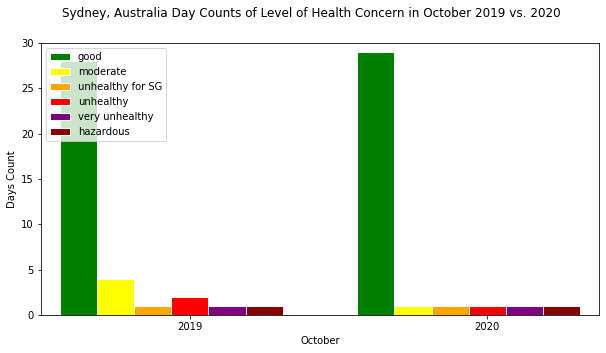

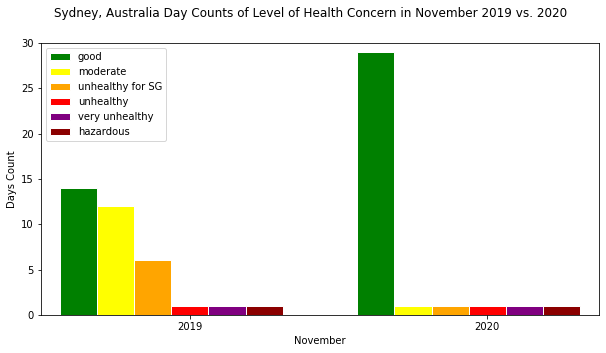

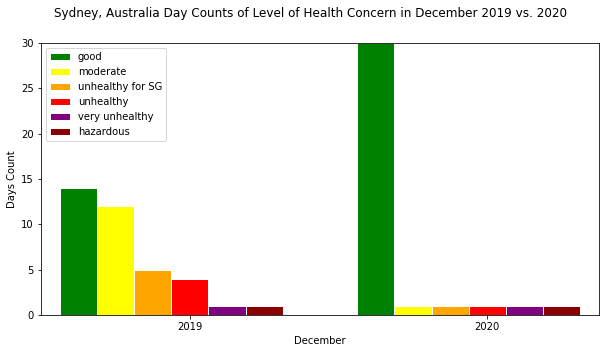

In [ ]:
lockdown_date = lockdown_dates['Sydney']
visulization(cur_city_name="Sydney",cur_country_name="Australia",\
            cur_city_path='city_cleaned_data/sydney_AQI.csv',\
            lockdown_date=lockdown_date,save_or_not=True,save_dir='visual_generated') #save_or_not means whether you want to save the visualization picture to disk.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8f485a30-0ad3-426a-aa3b-c5e3cbe23db6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>